# Animation of a double pendulum
- equations are based on: http://sophia.dtp.fmph.uniba.sk/~kovacik/doublePendulum.pdf

If the animation library is not available, install form github

In [ ]:
#if not instelled
# %%bash
#pip install git+https://github.com/jakevdp/JSAnimation.git --user

### Import packages

In [5]:
%pylab inline
# JSAnimation import available at https://github.com/jakevdp/JSAnimation
from JSAnimation import IPython_display
from matplotlib import animation

from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

Populating the interactive namespace from numpy and matplotlib


### Set parameters (SI units)

In [6]:
G = 9.8  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 1.0  # length of pendulum 2 in m
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 1.0  # mass of pendulum 2 in kg

### The differential equation of the double pendulum

In [7]:
def derivs(state, t):

    dydx = np.zeros_like(state)
    dydx[0] = state[1]

    del_ = state[2] - state[0]
    den1 = (M1 + M2)*L1 - M2*L1*cos(del_)*cos(del_)
    dydx[1] = (M2*L1*state[1]*state[1]*sin(del_)*cos(del_) +
               M2*G*sin(state[2])*cos(del_) +
               M2*L2*state[3]*state[3]*sin(del_) -
               (M1 + M2)*G*sin(state[0]))/den1

    dydx[2] = state[3]

    den2 = (L2/L1)*den1
    dydx[3] = (-M2*L2*state[3]*state[3]*sin(del_)*cos(del_) +
               (M1 + M2)*G*sin(state[0])*cos(del_) -
               (M1 + M2)*L1*state[1]*state[1]*sin(del_) -
               (M1 + M2)*G*sin(state[2]))/den2

    return dydx

### Set initial parameters

In [8]:
# create a time array from 0..100 sampled at 0.05 second steps
dt = 0.01
t = np.arange(0.0, 20, dt)

# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
th1 = 120.0
w1 = 0.0
th2 = -10.0
w2 = 0.0

# initial state
state = np.radians([th1, w1, th2, w2])

### Run the simulation and visualize.  
<span class="label label-warning">Note:</span> this may take few minutes to start.


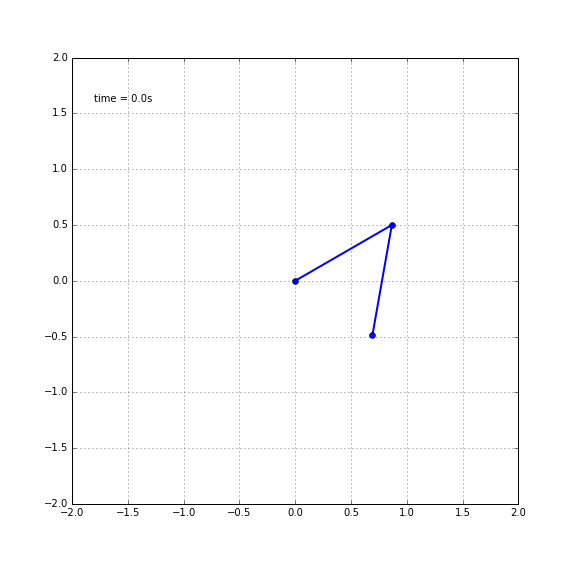
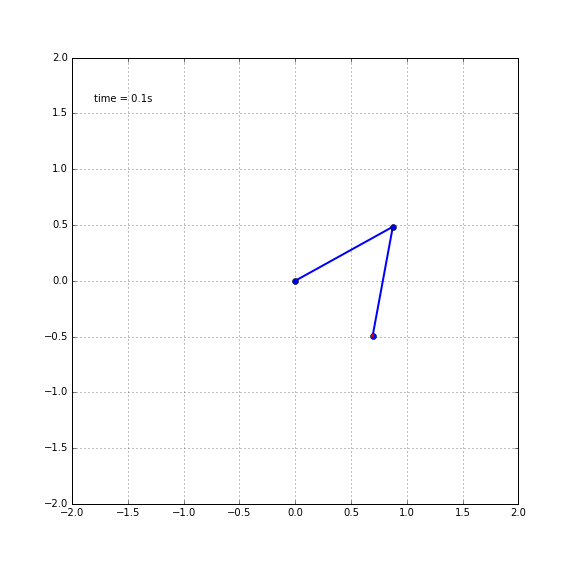
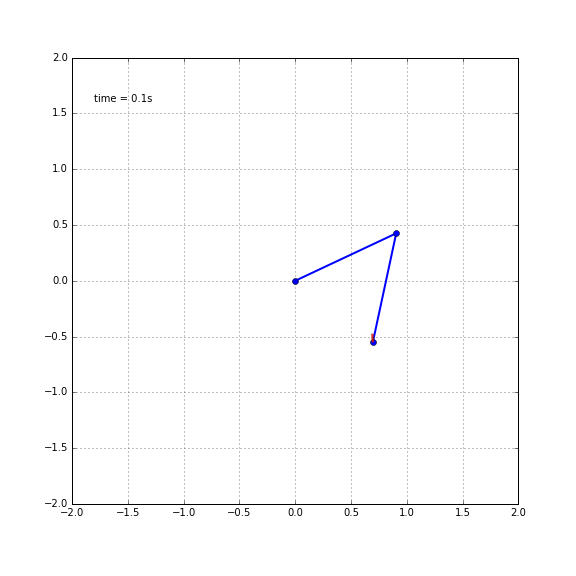
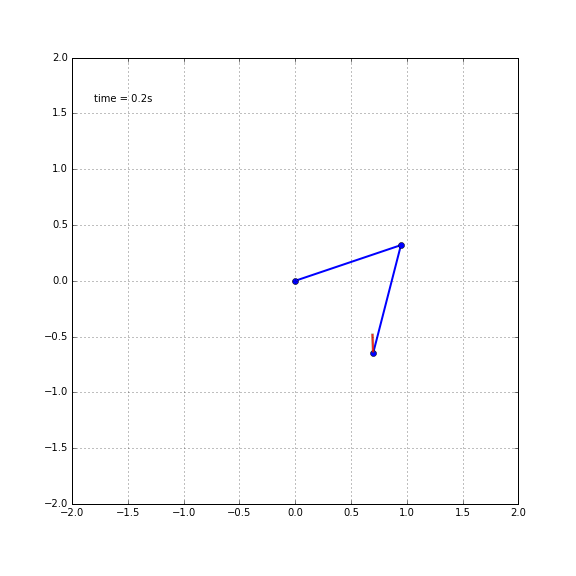
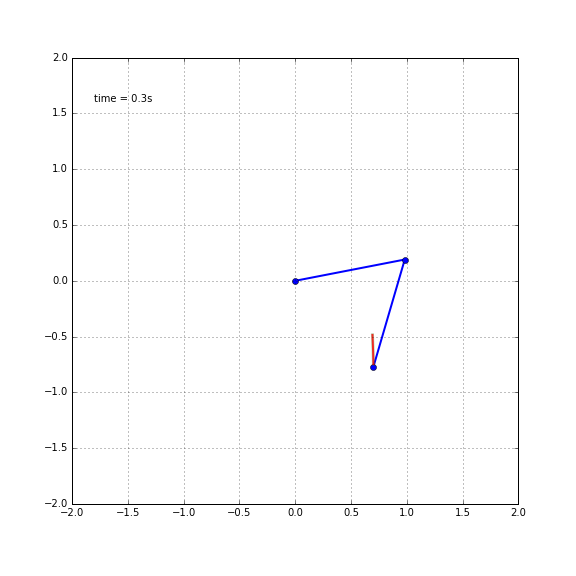
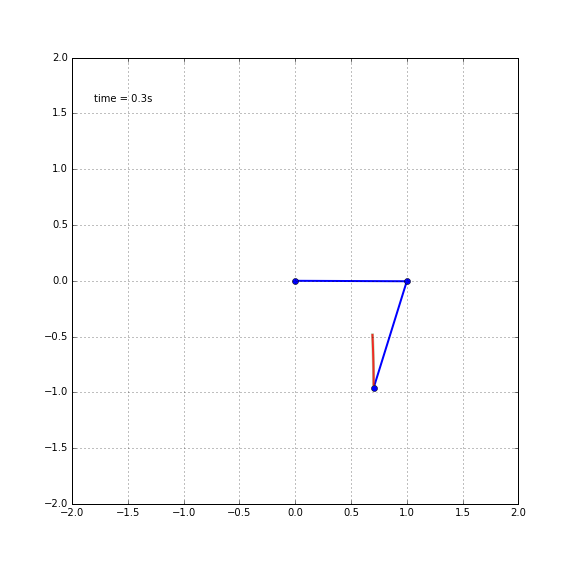
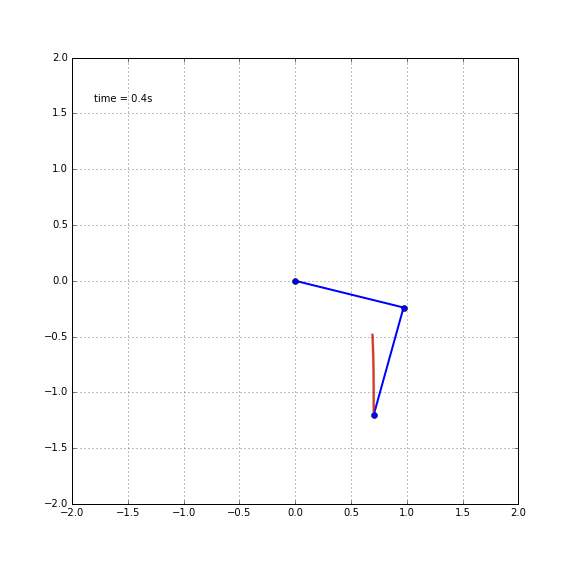
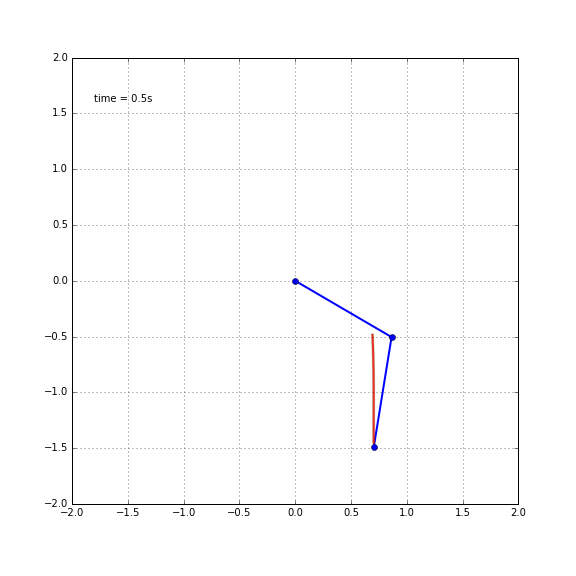
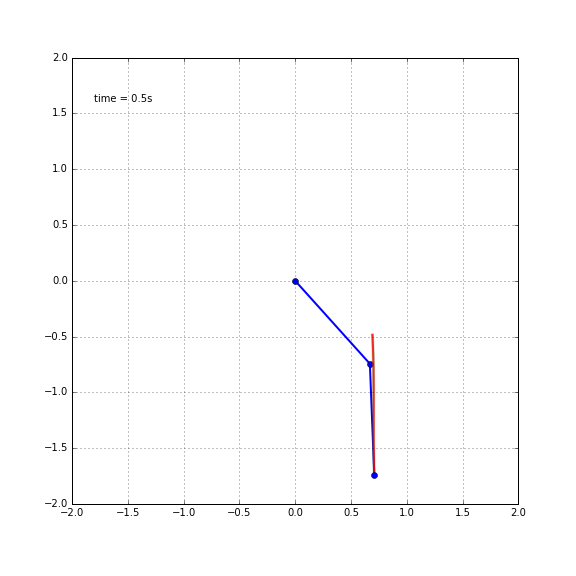
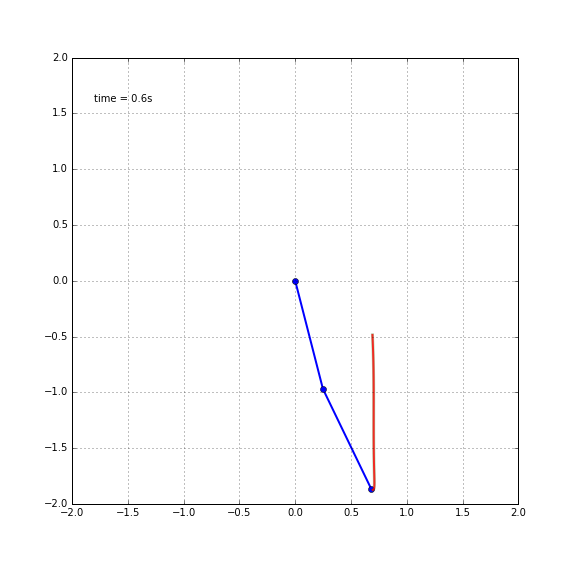
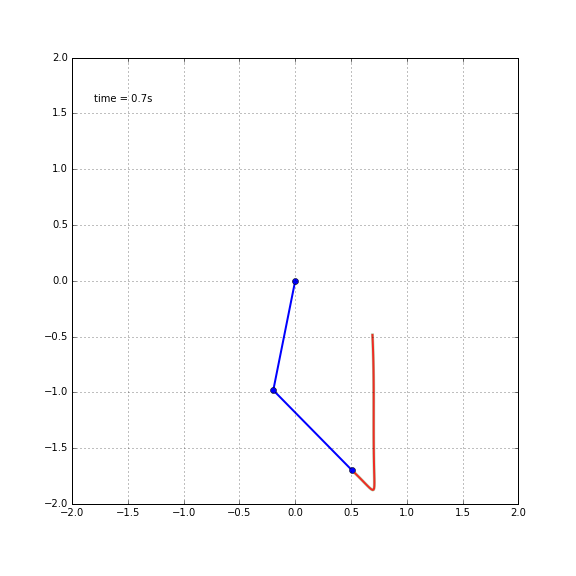
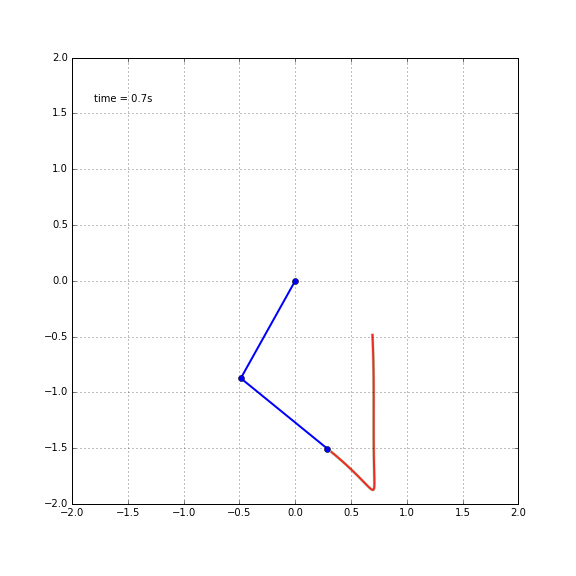
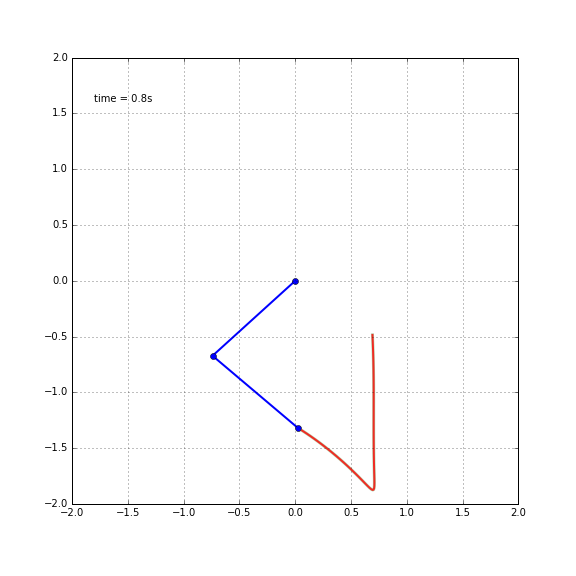
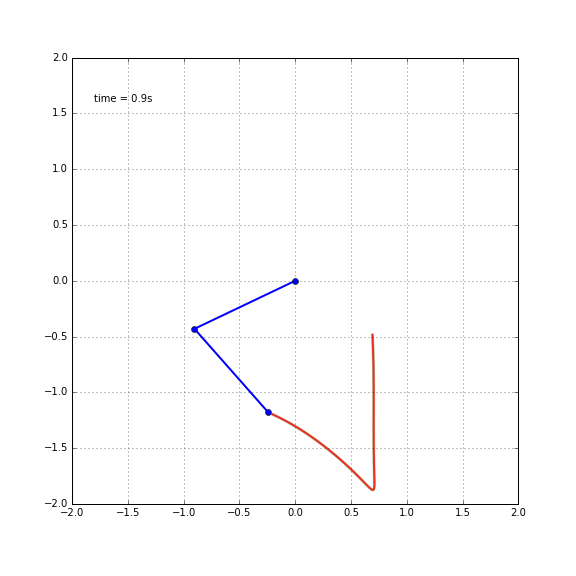
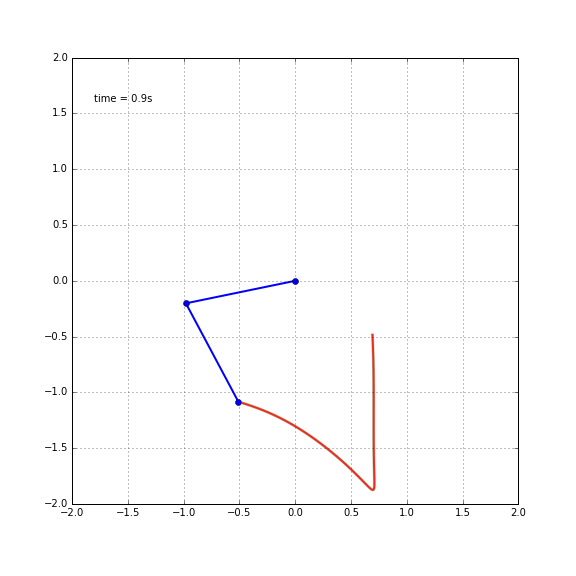
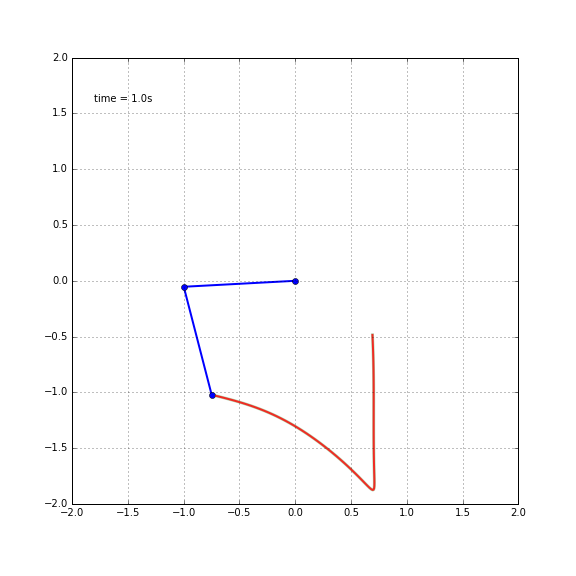
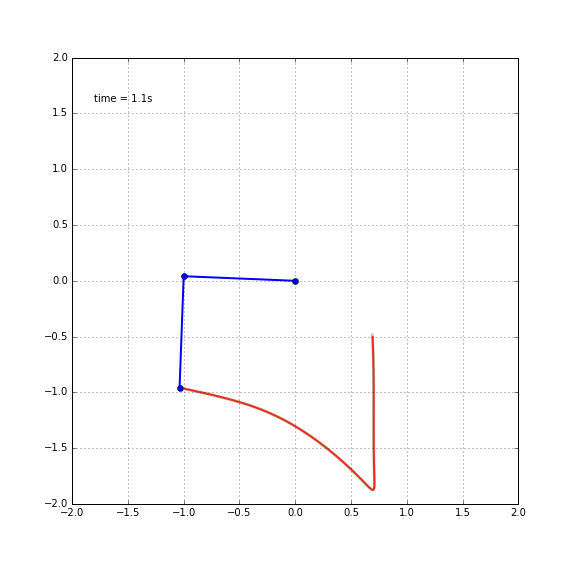
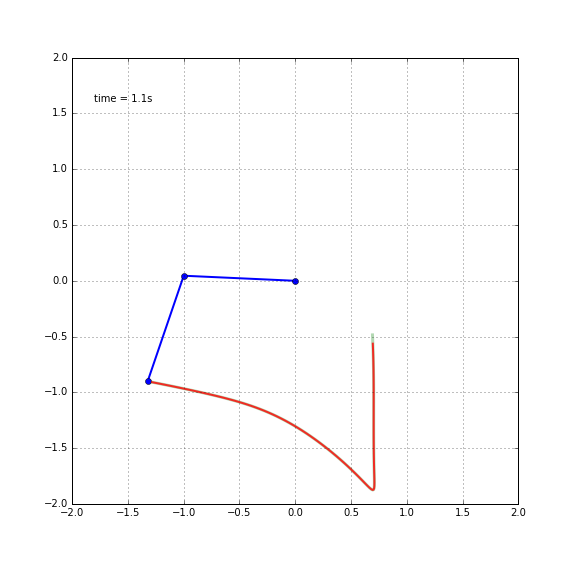
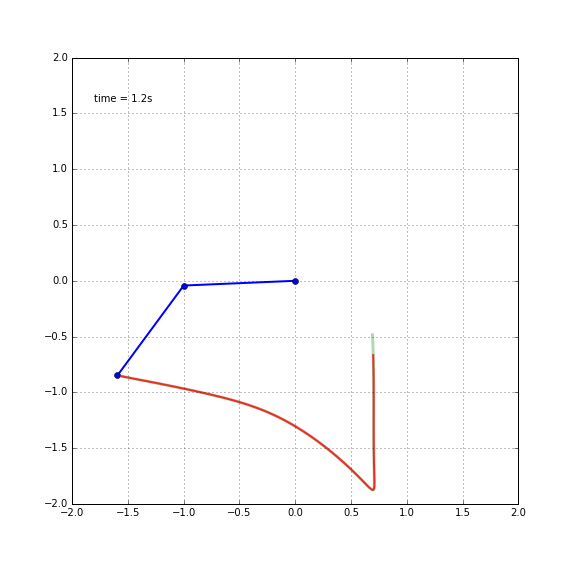
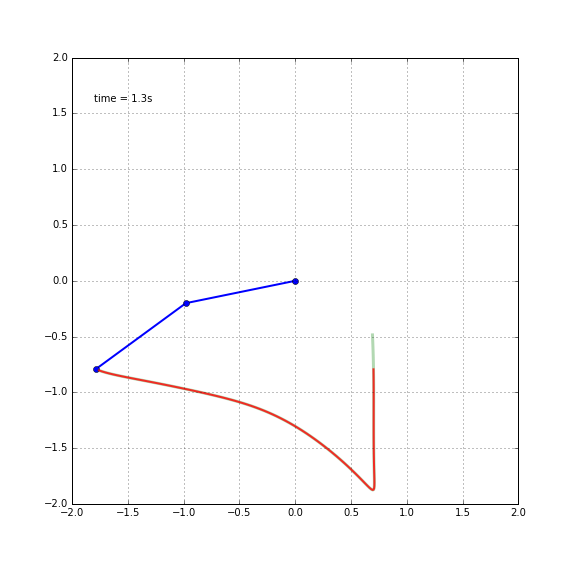
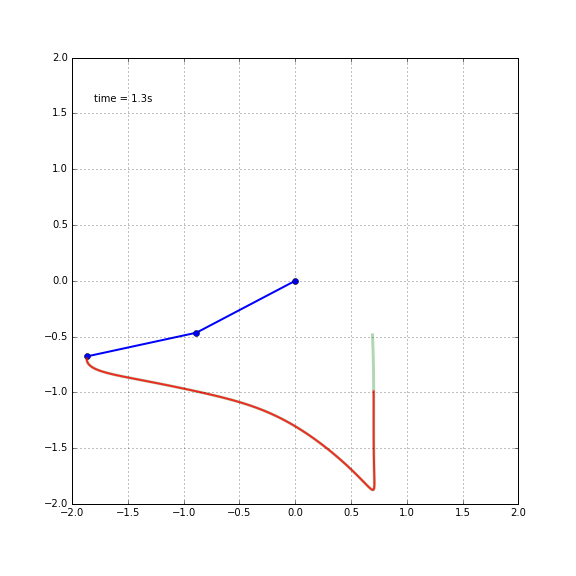
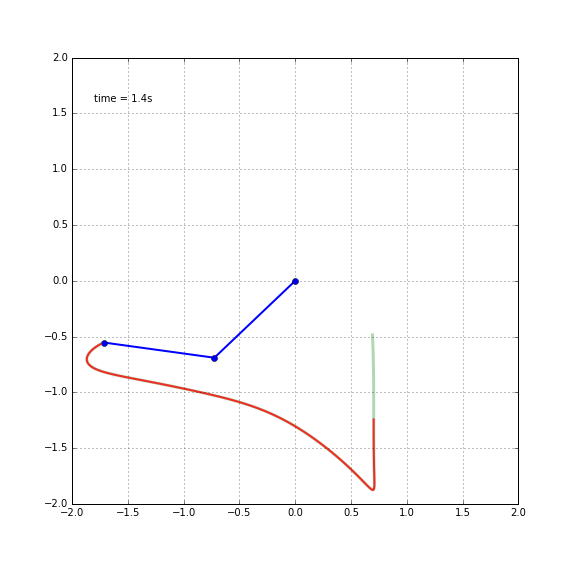
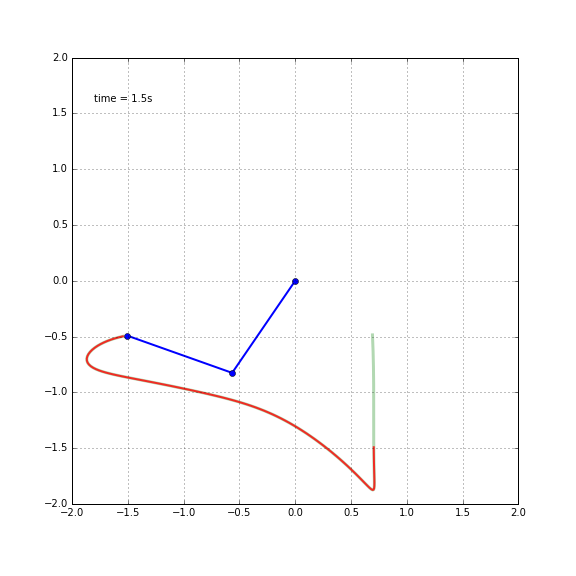
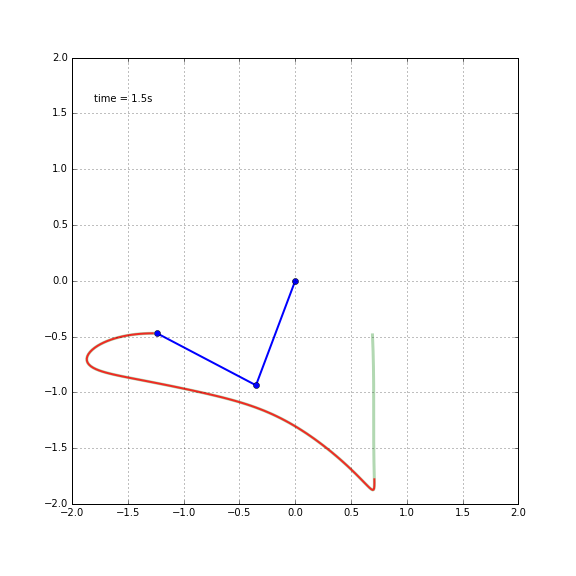
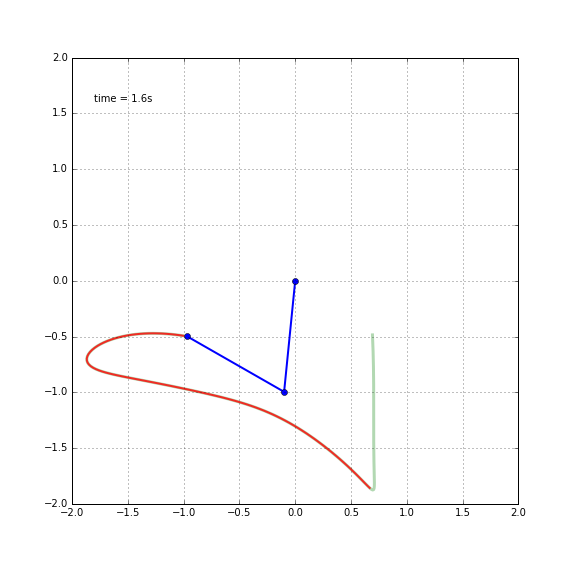
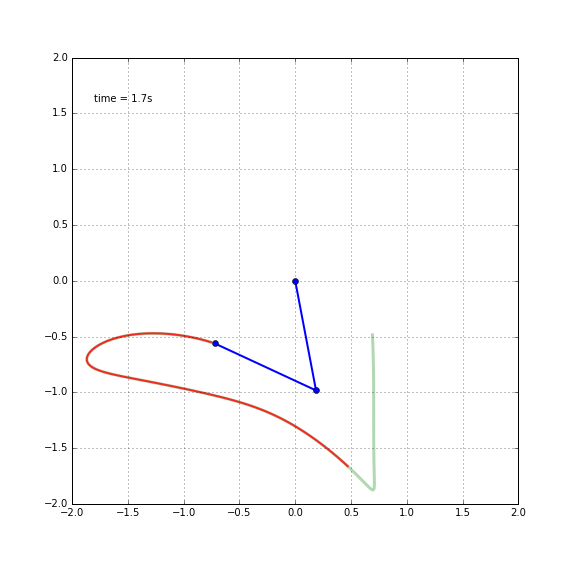
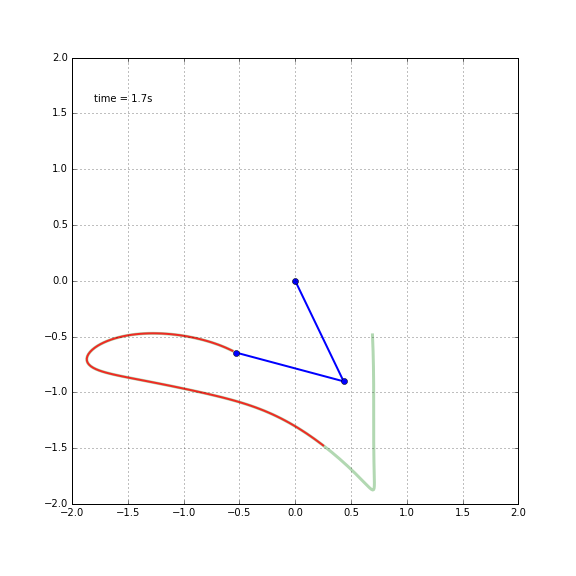
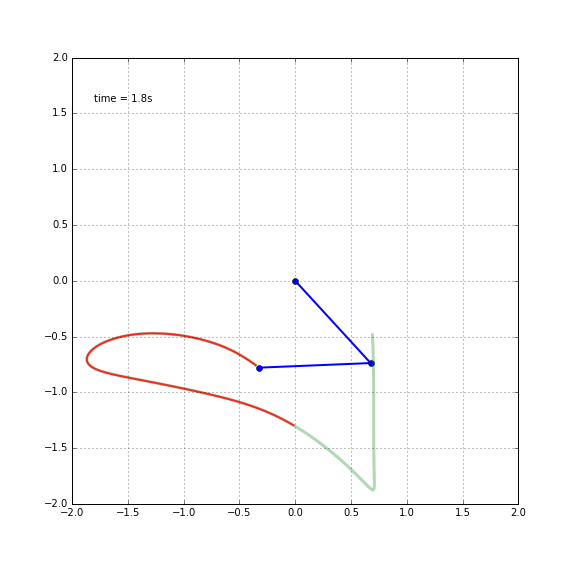
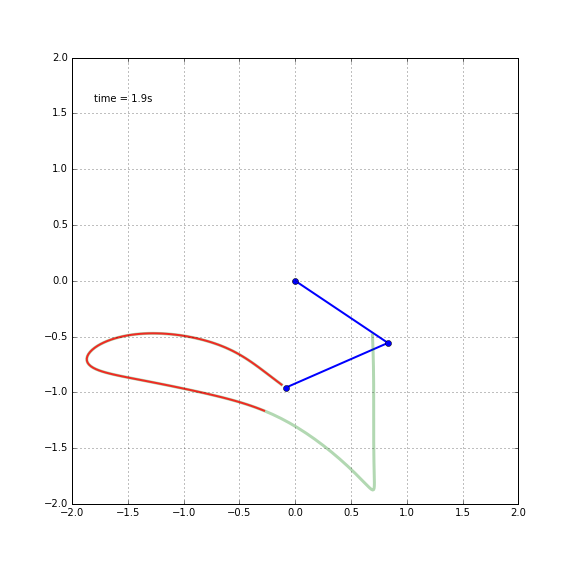
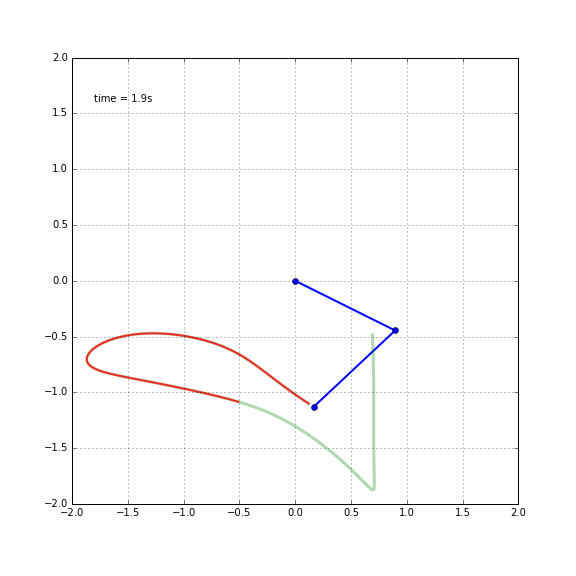
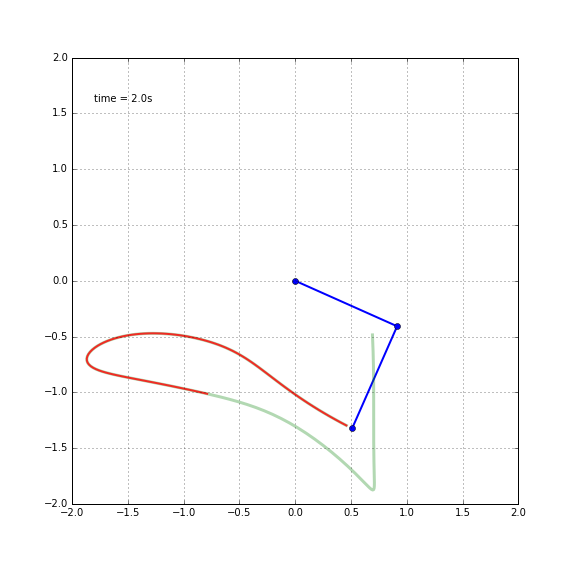
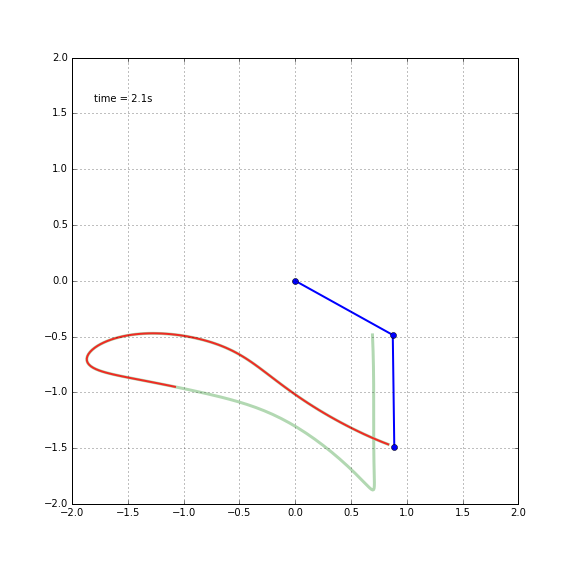
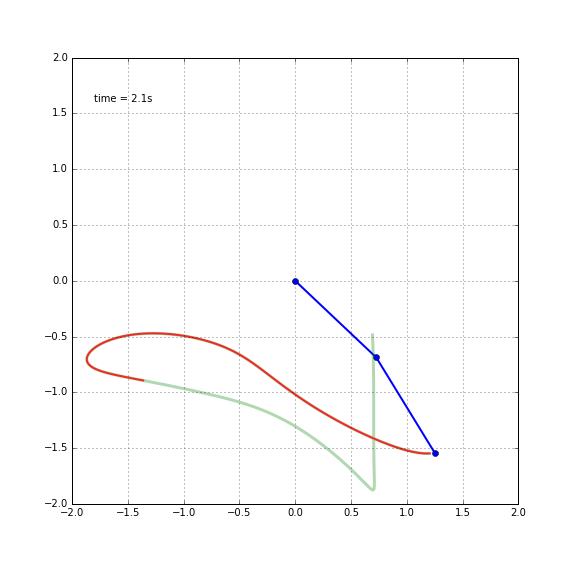
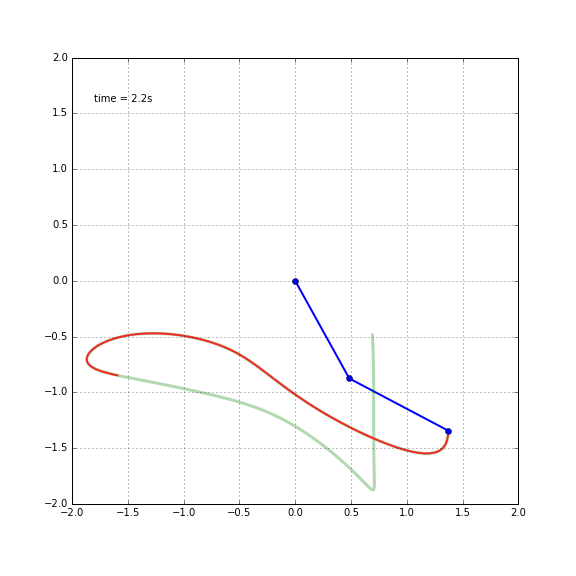
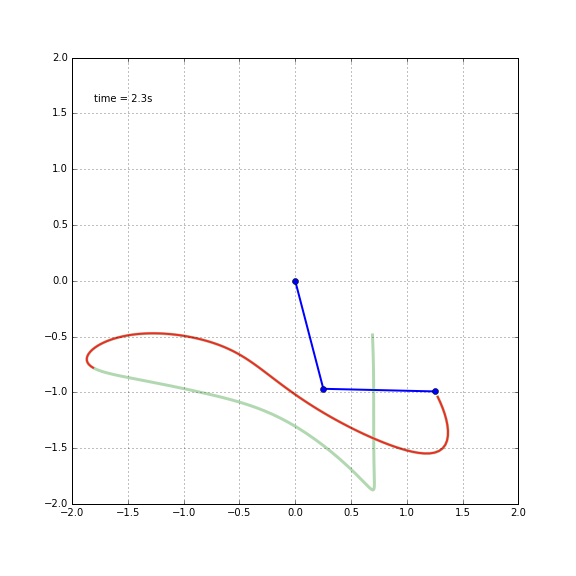
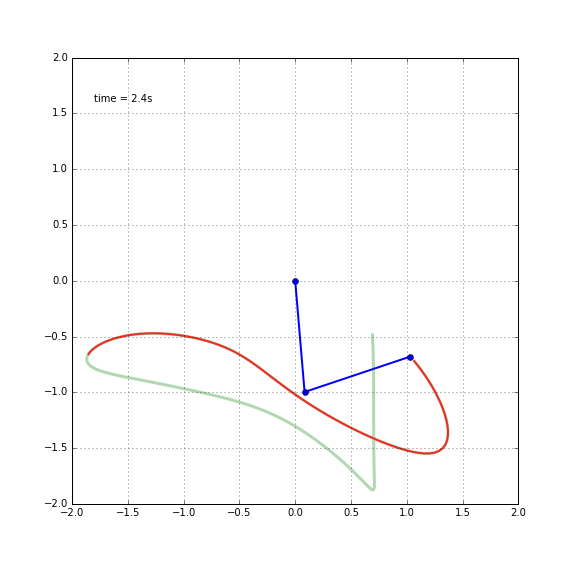
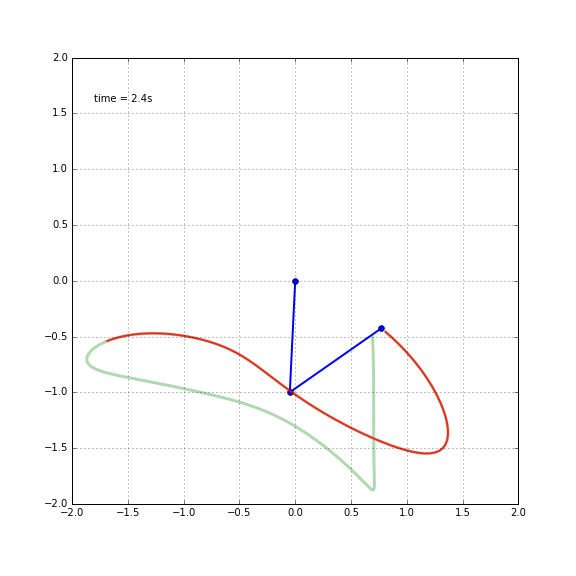
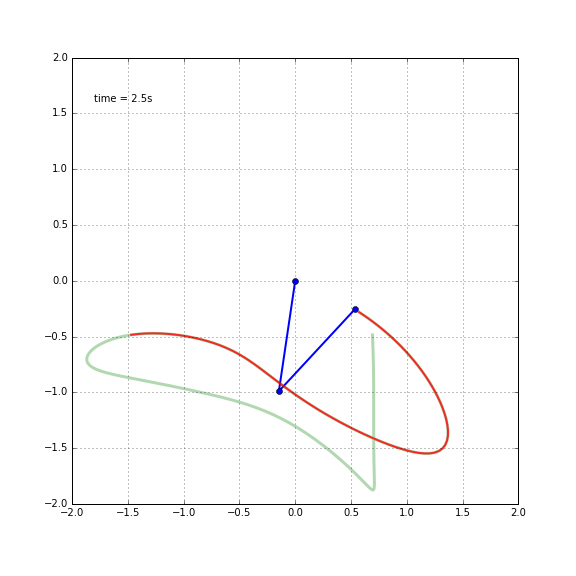
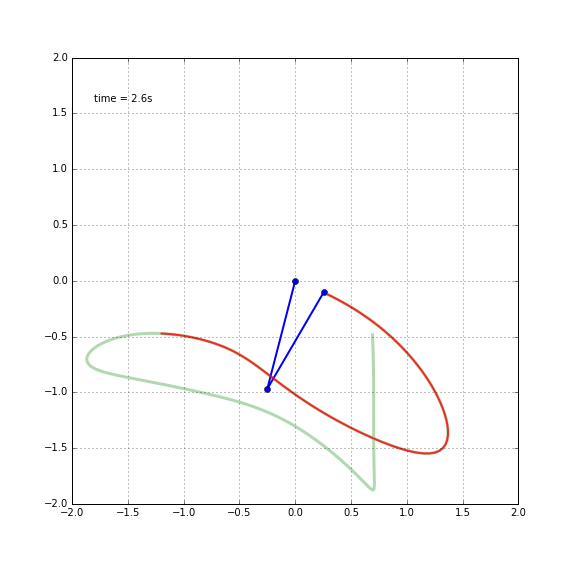
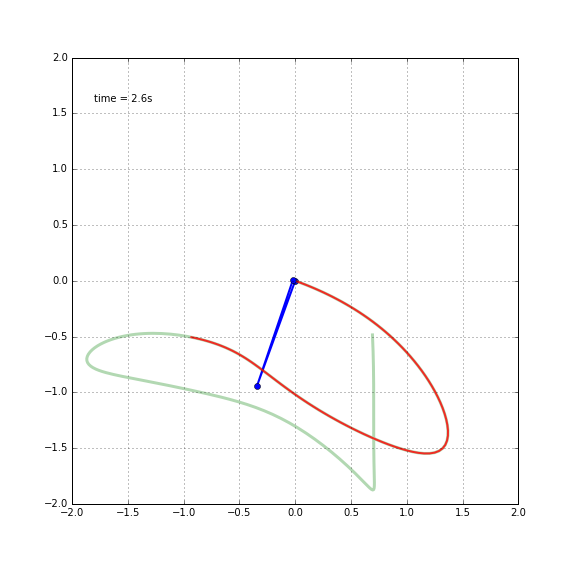
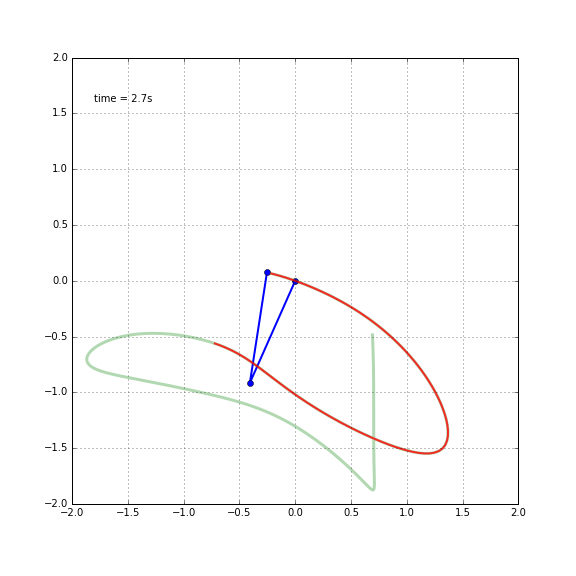
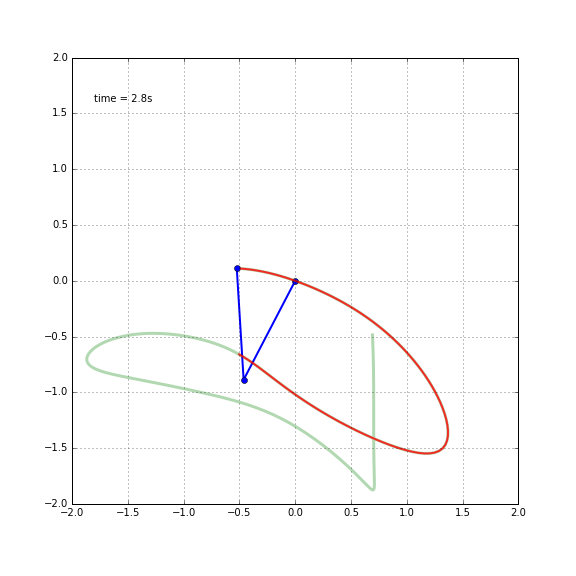
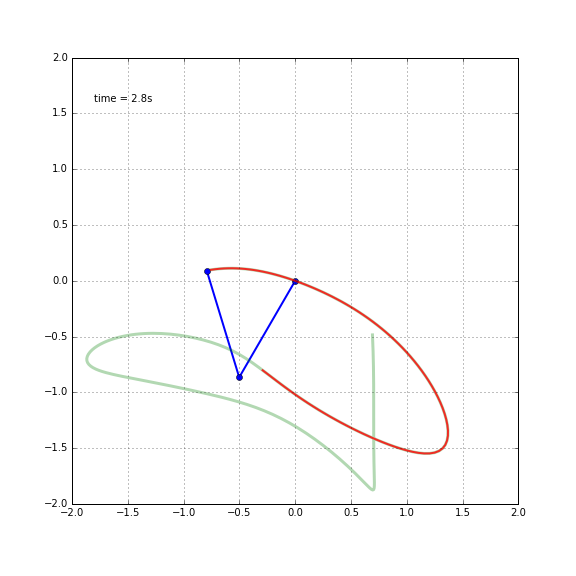
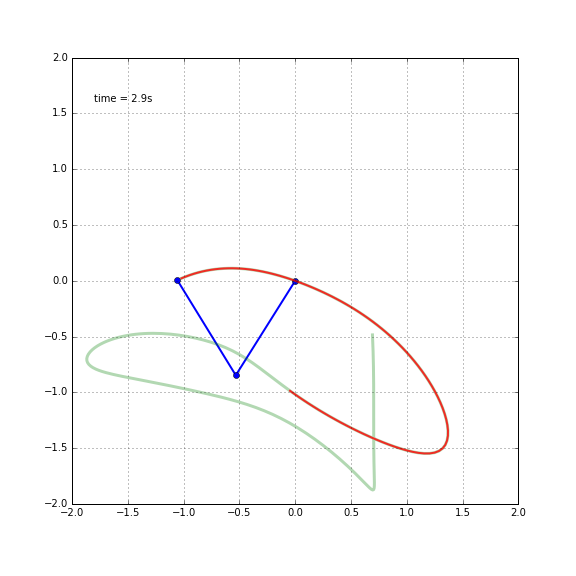
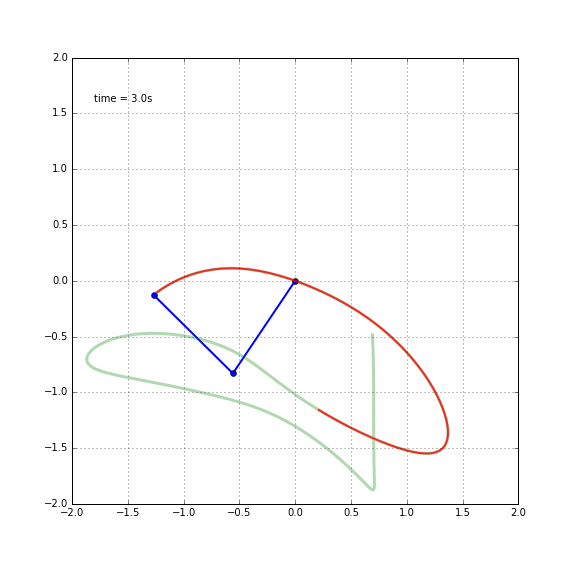
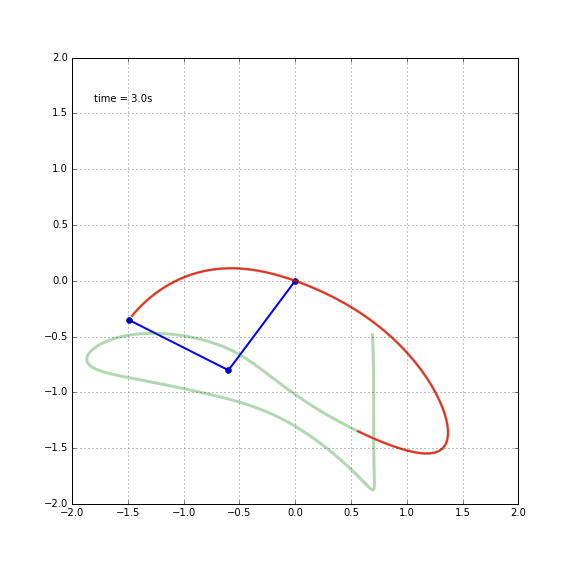
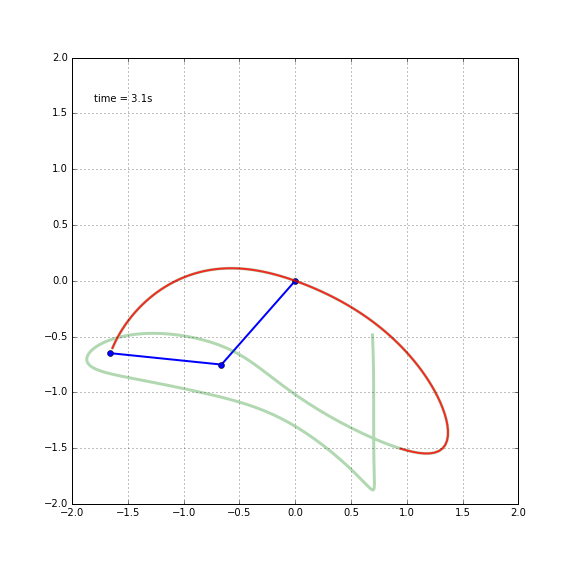
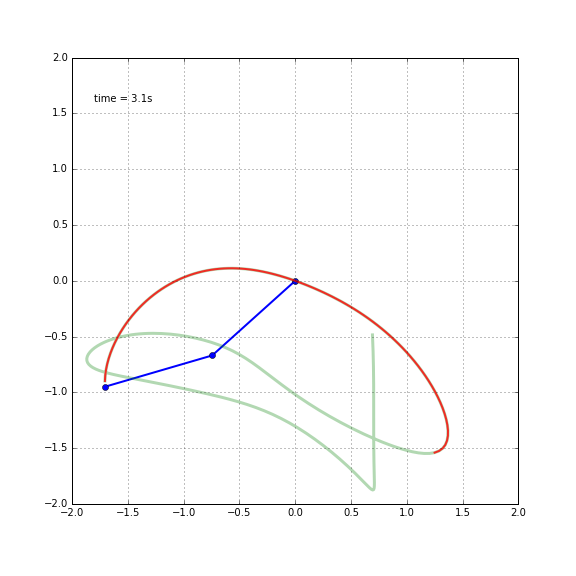
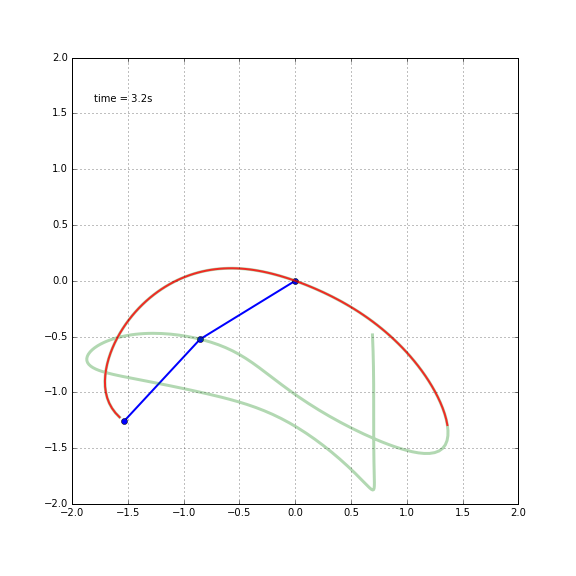
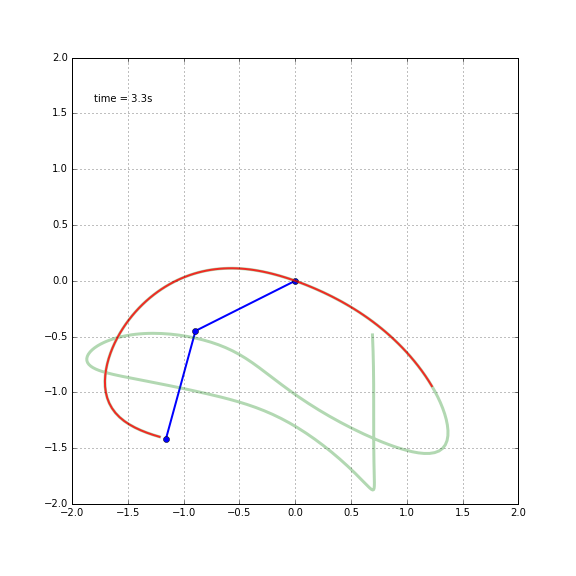
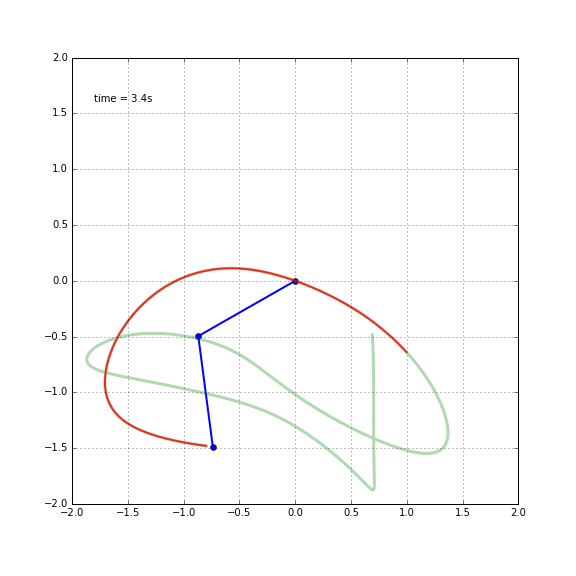
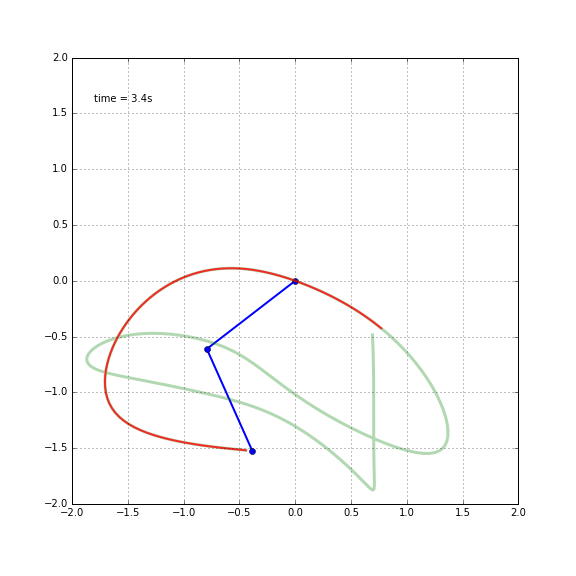
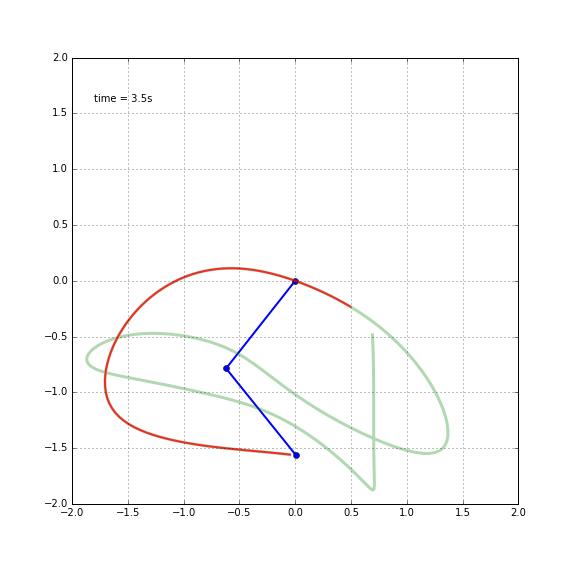
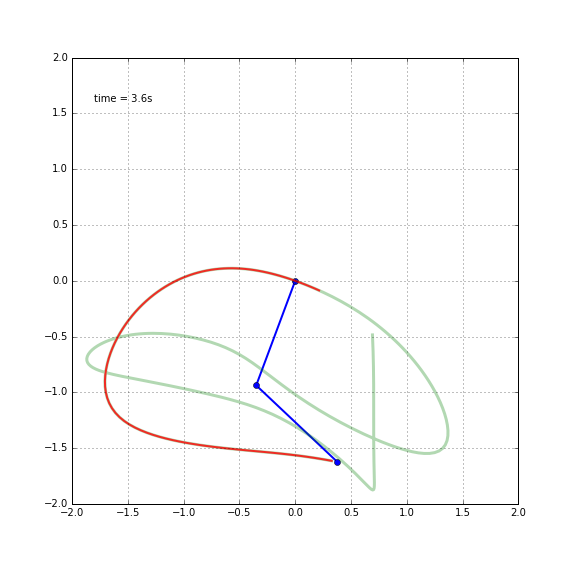
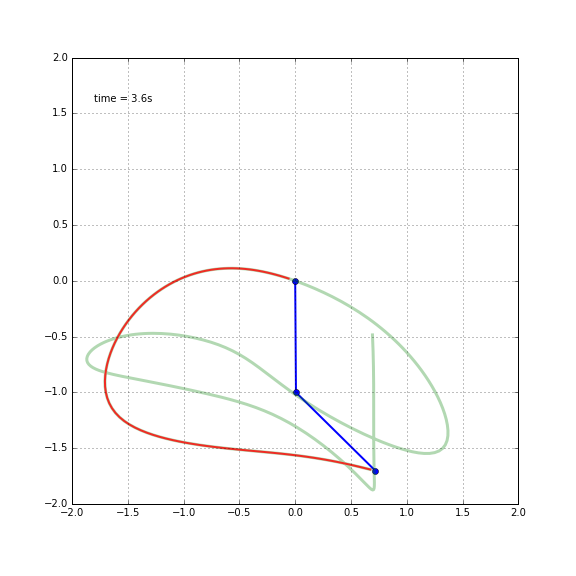
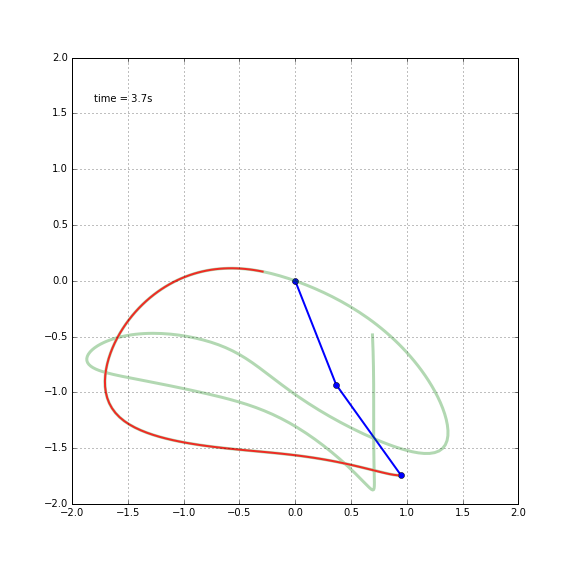
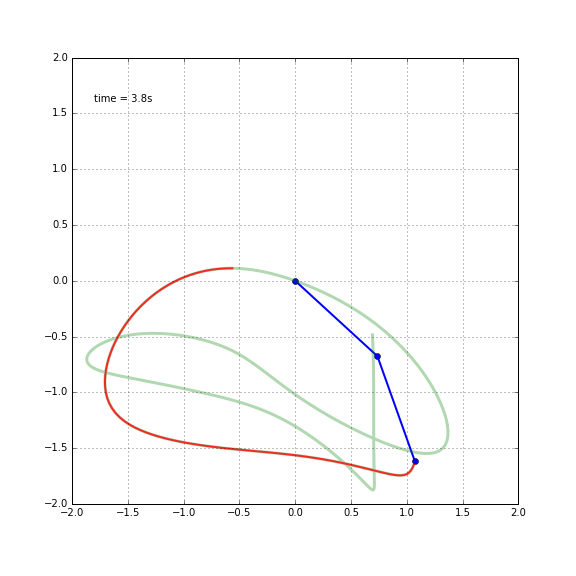
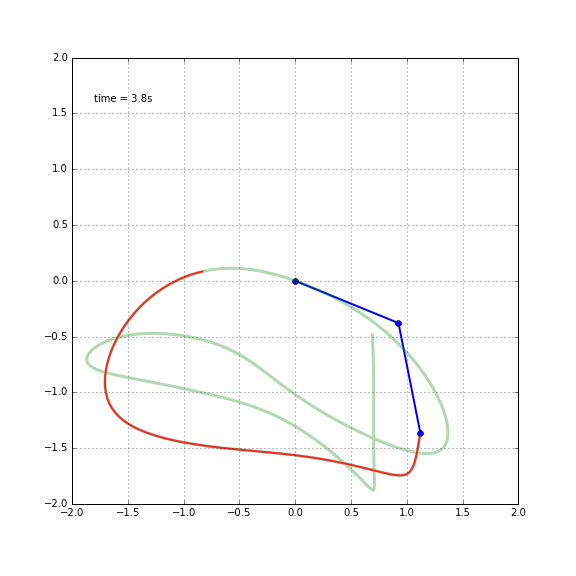
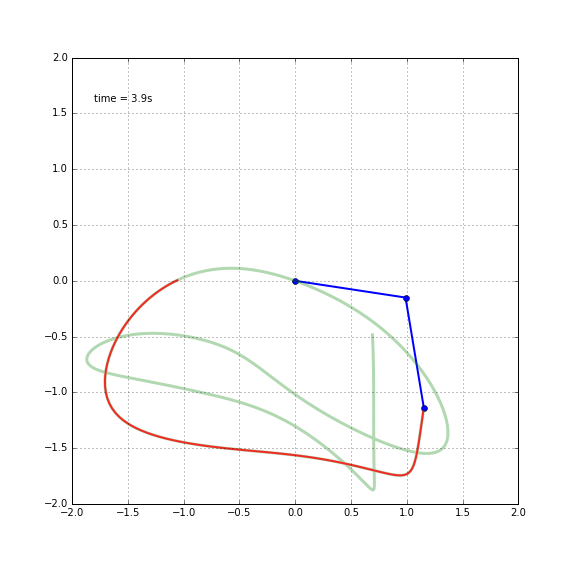
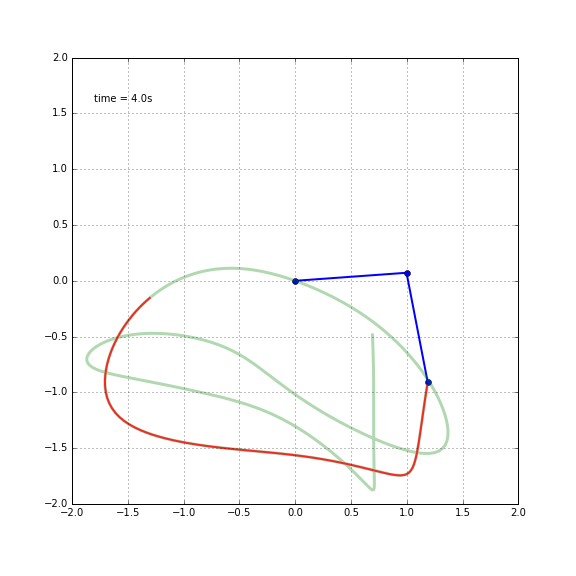
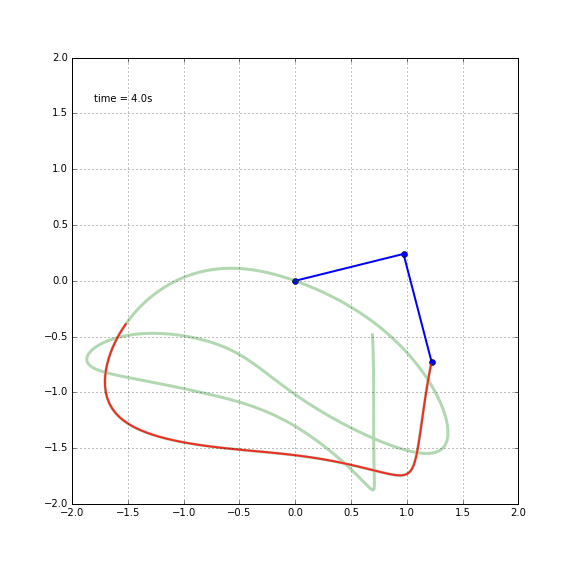
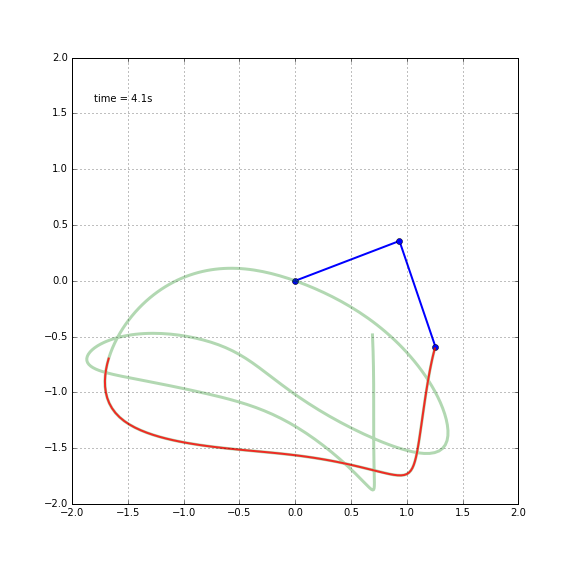
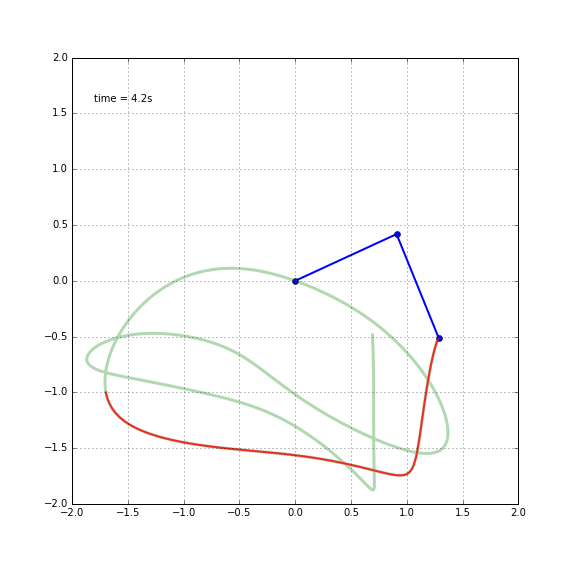
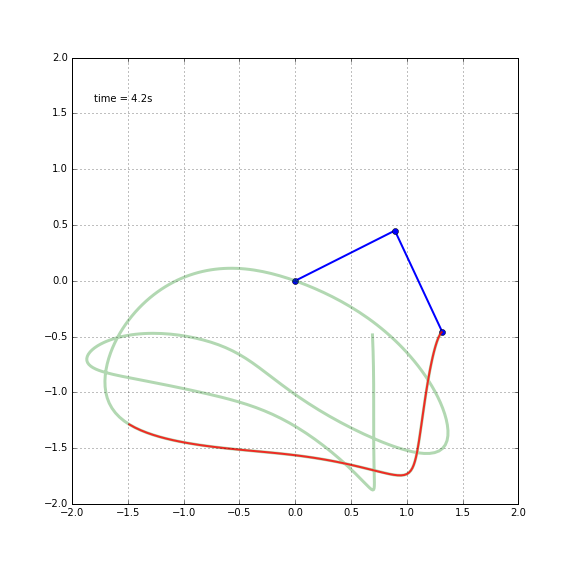
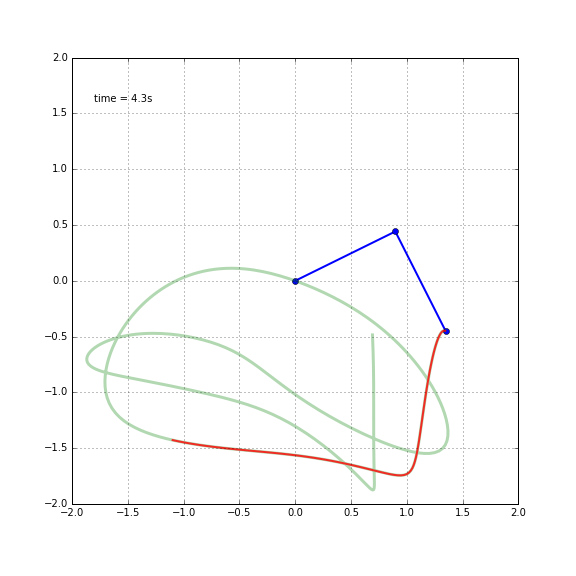
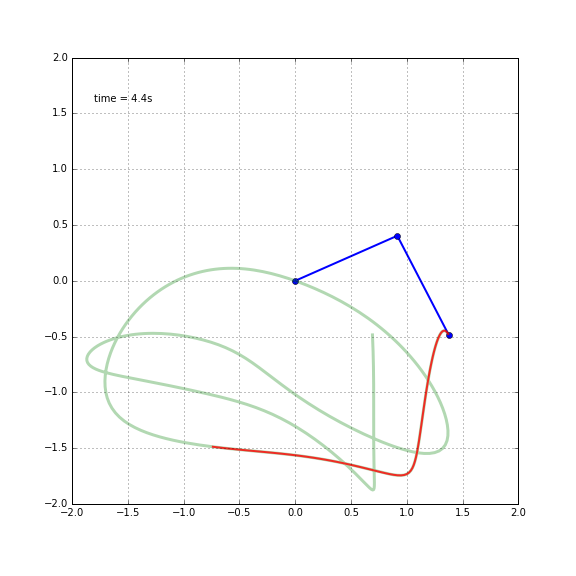
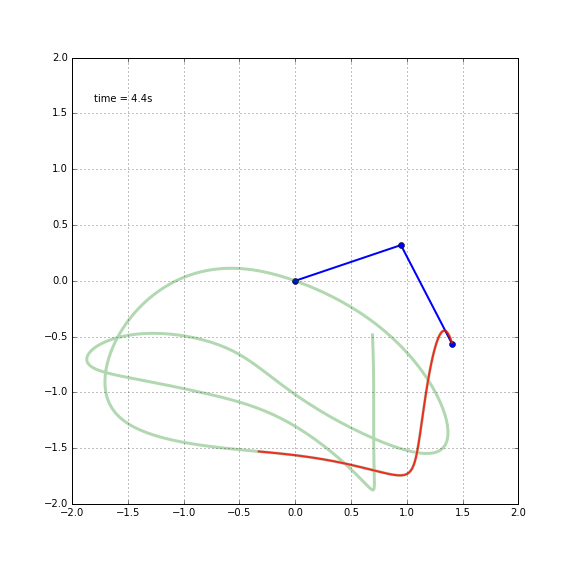
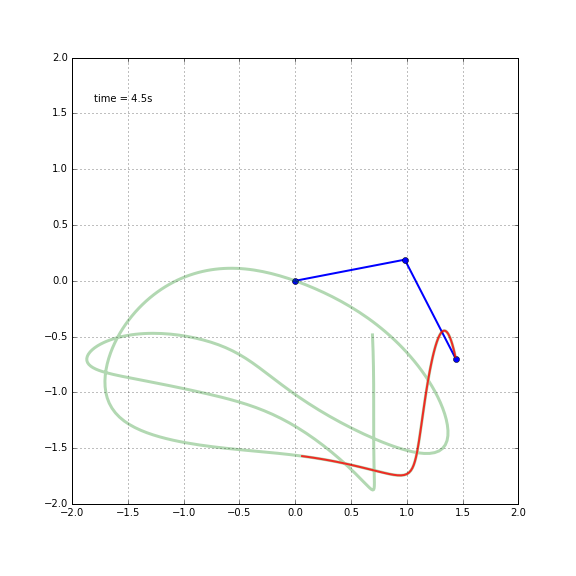
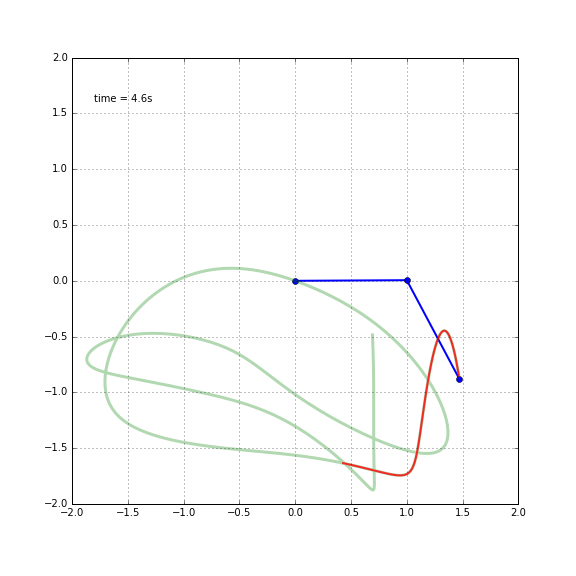
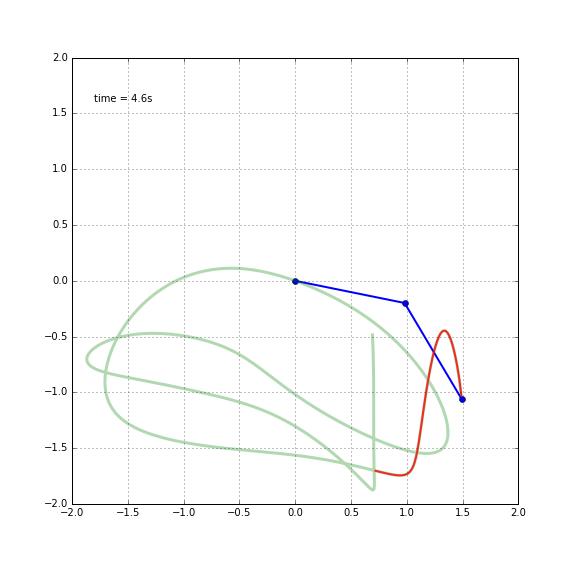
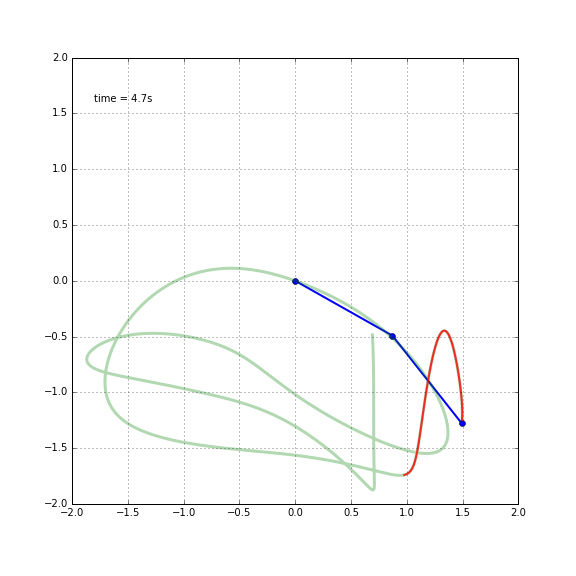
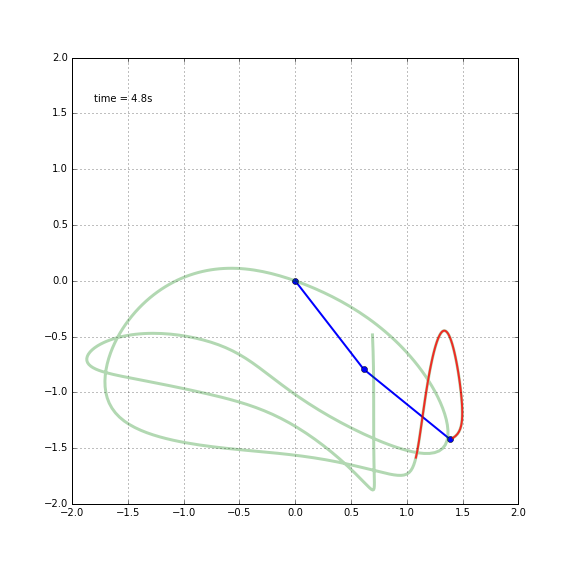
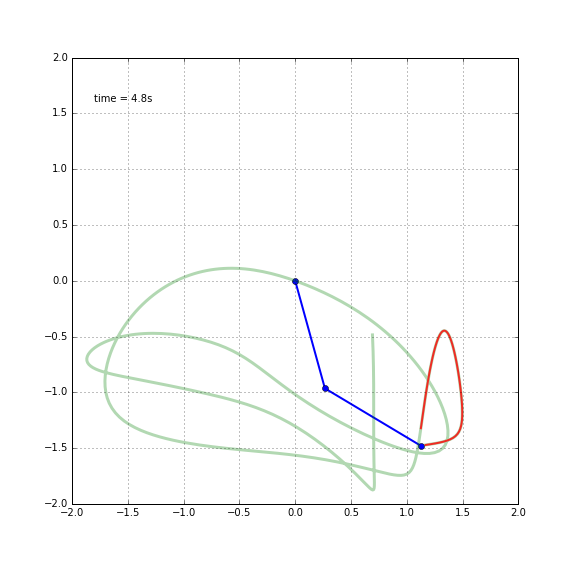
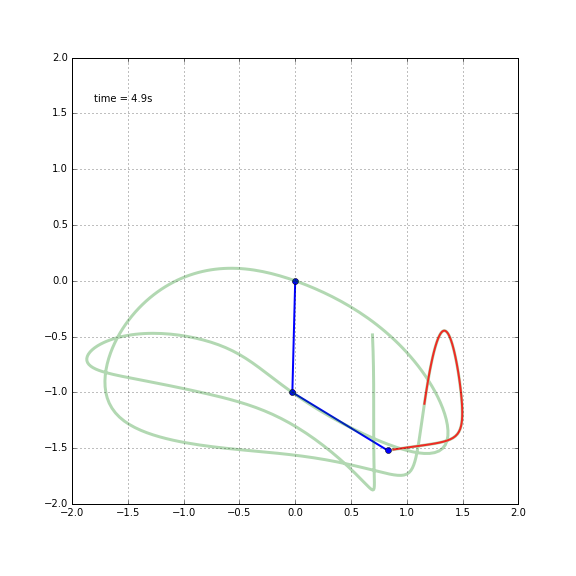
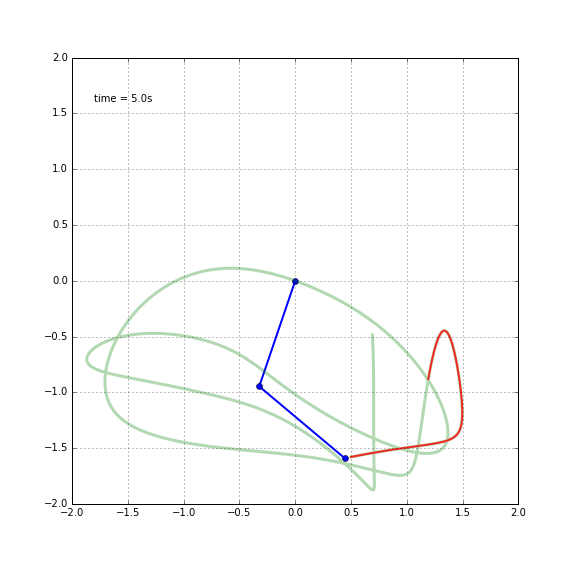
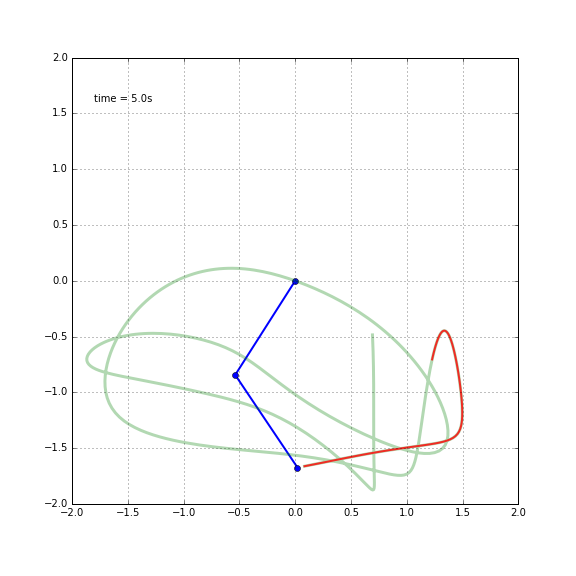
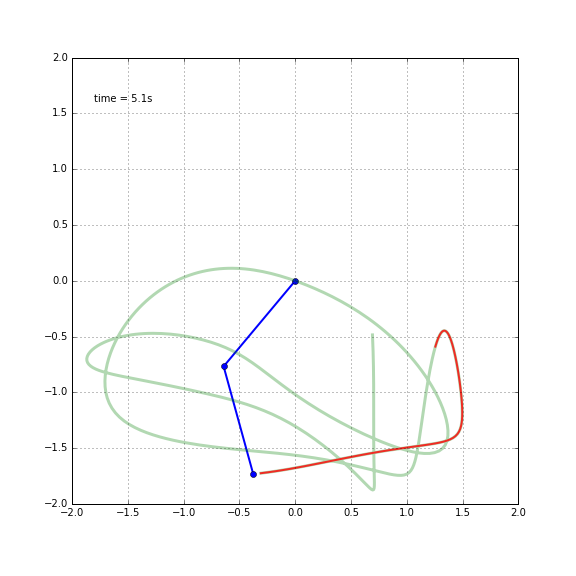
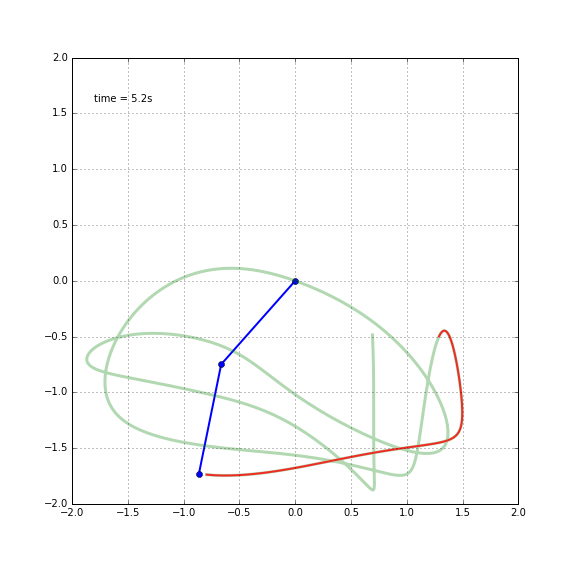
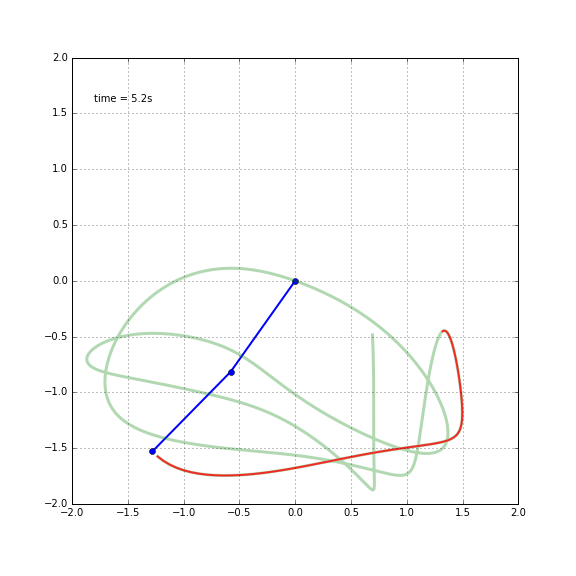
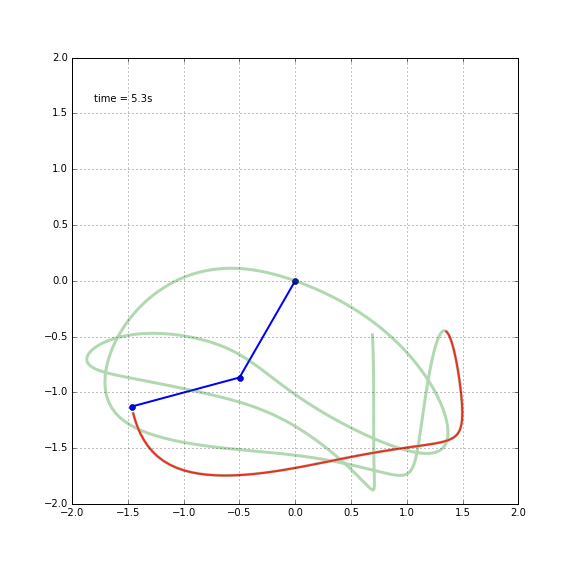
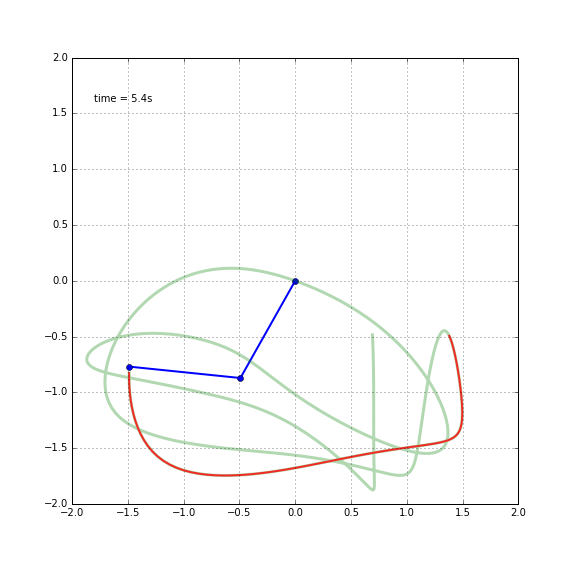
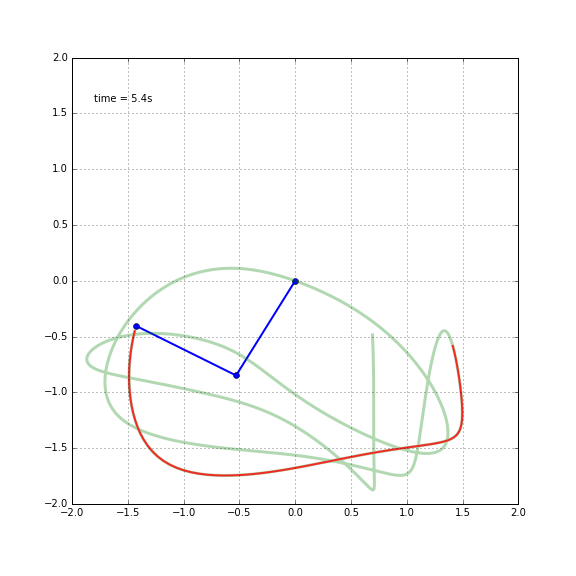
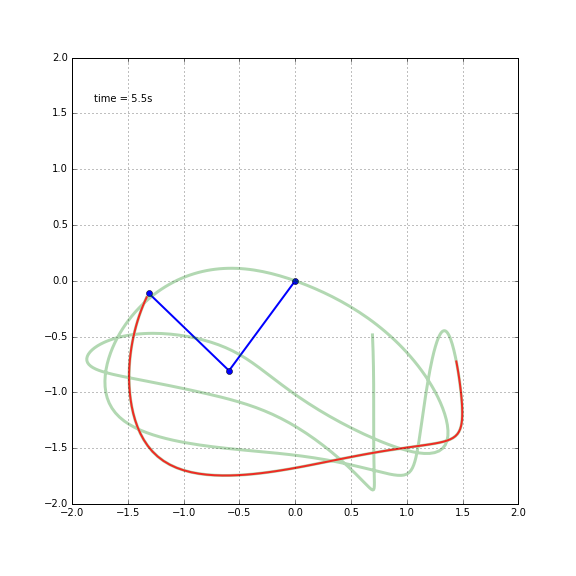
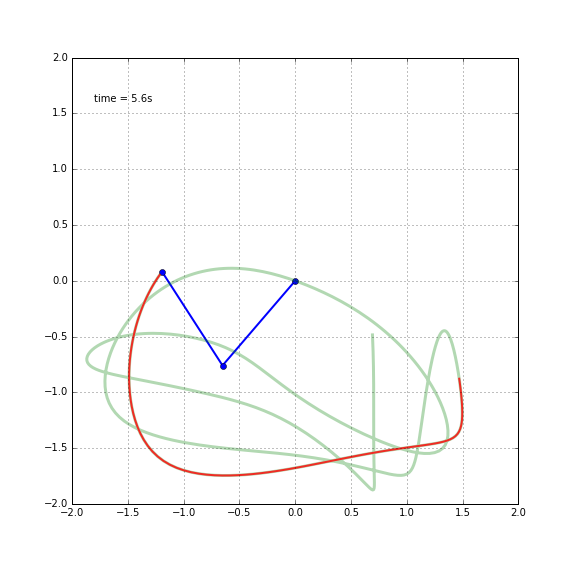
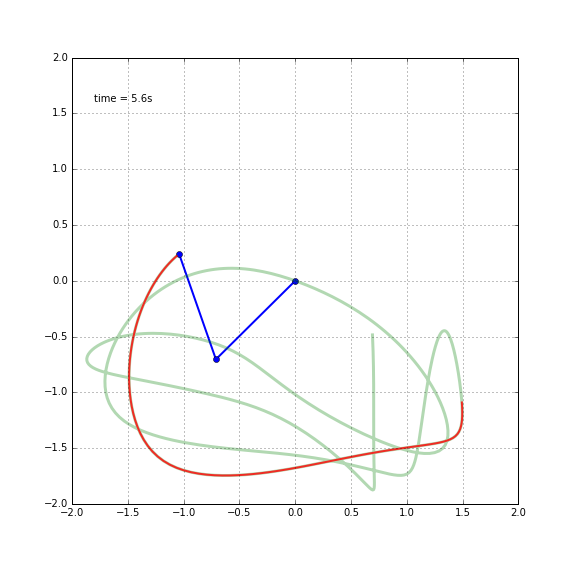
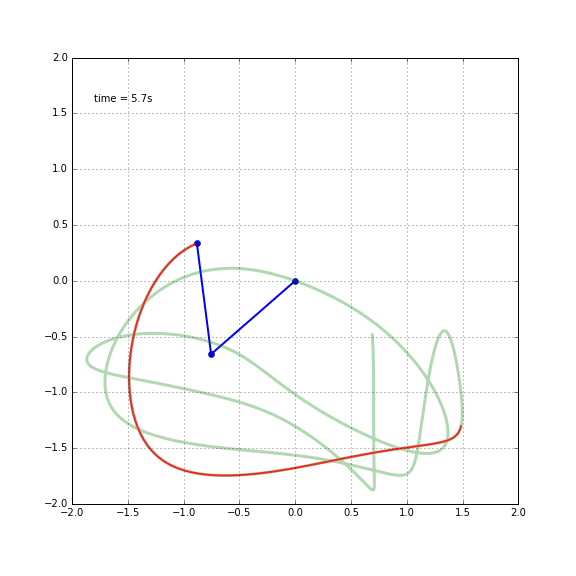
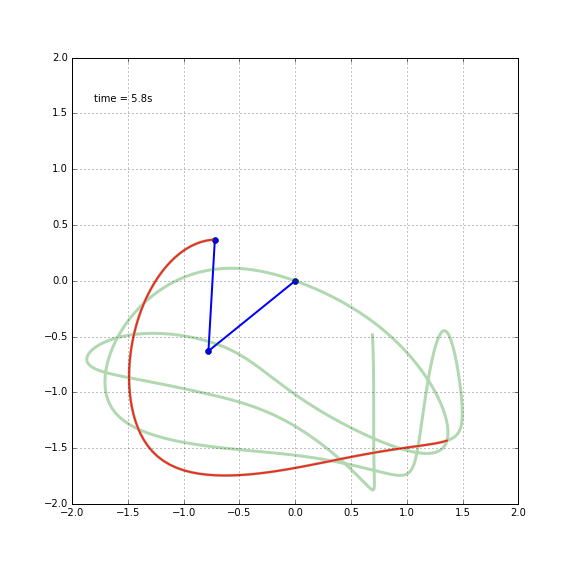
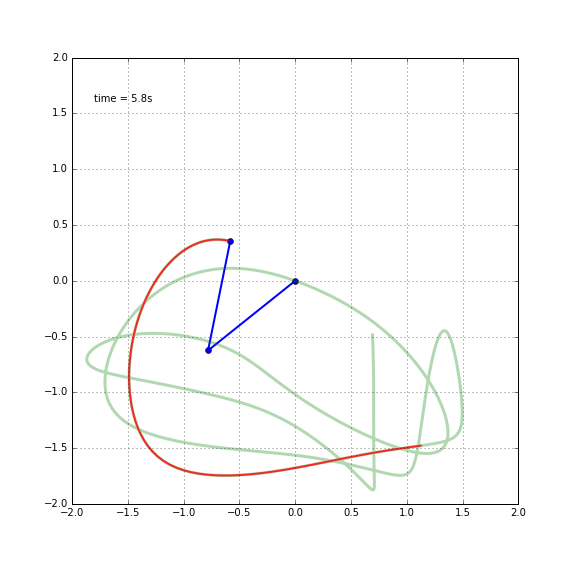
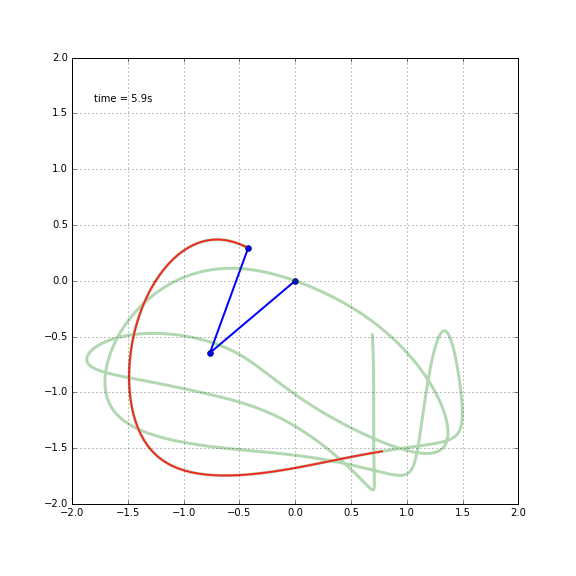
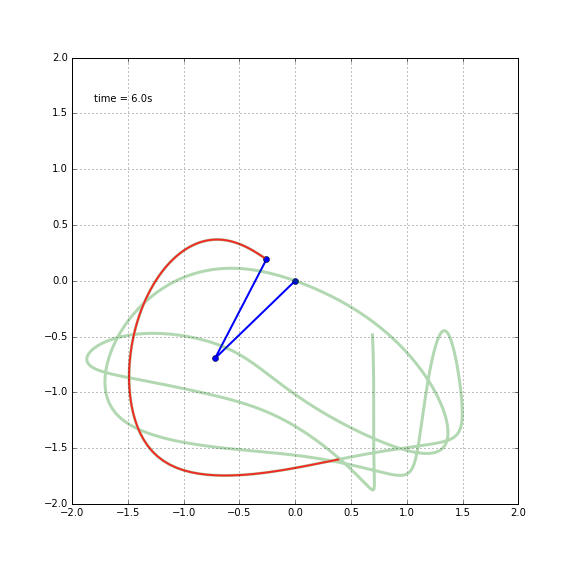
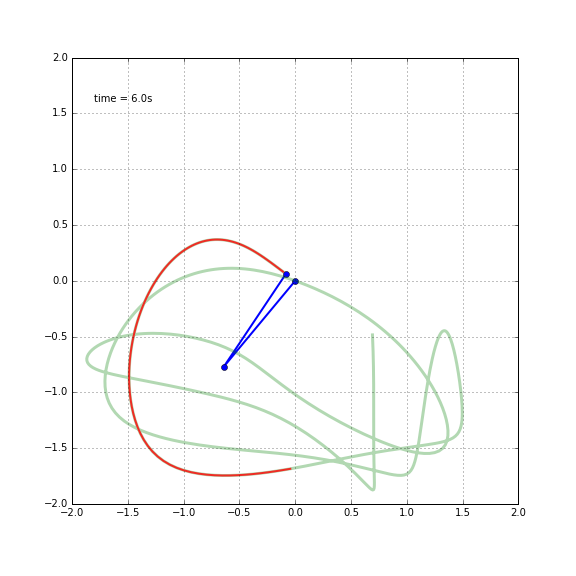
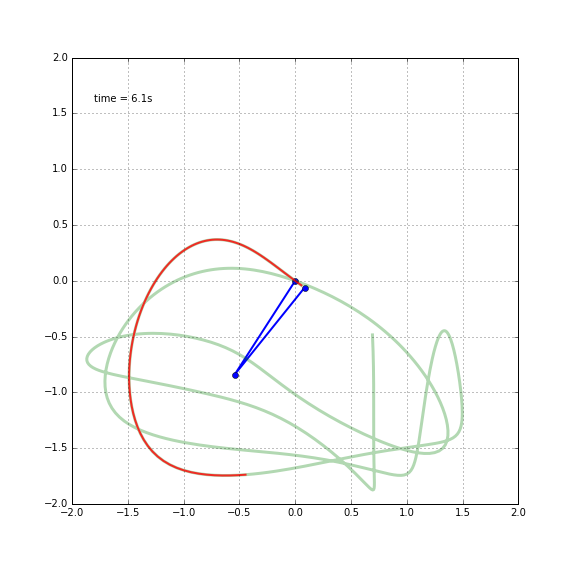
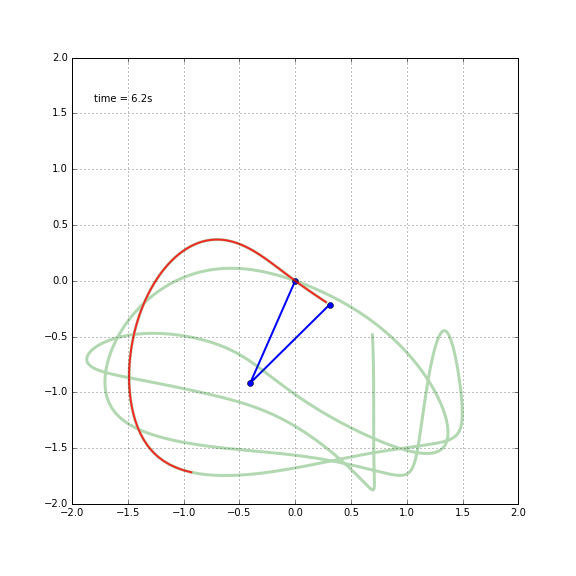
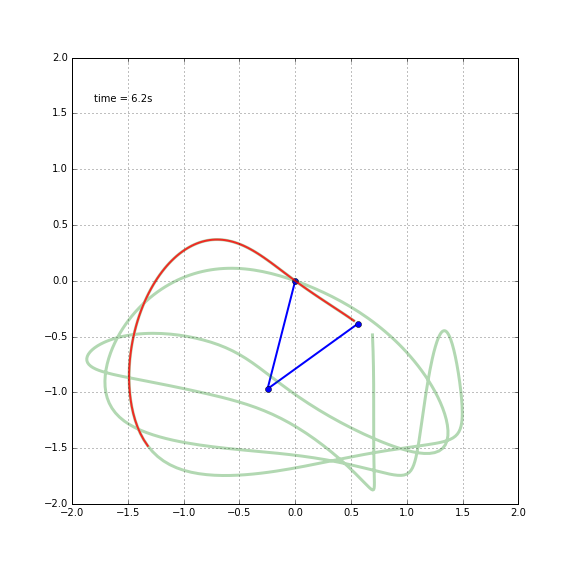
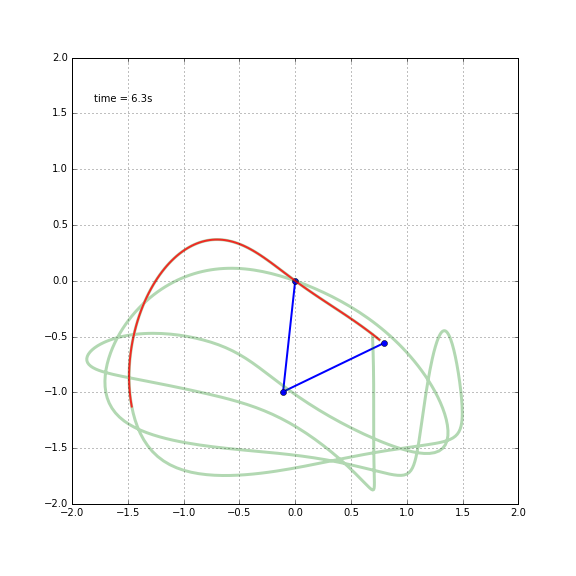
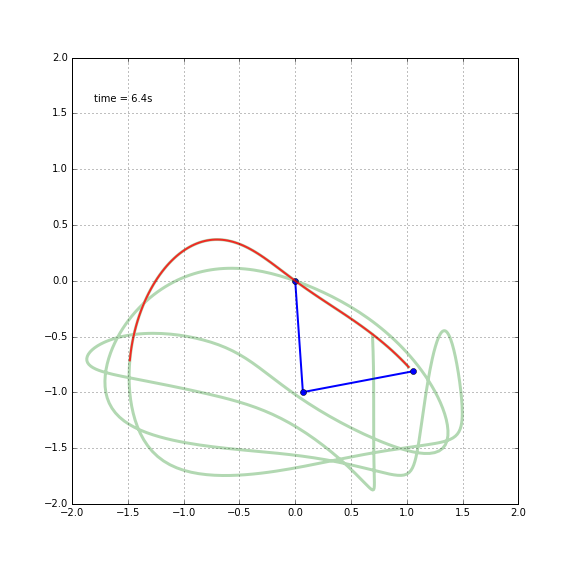
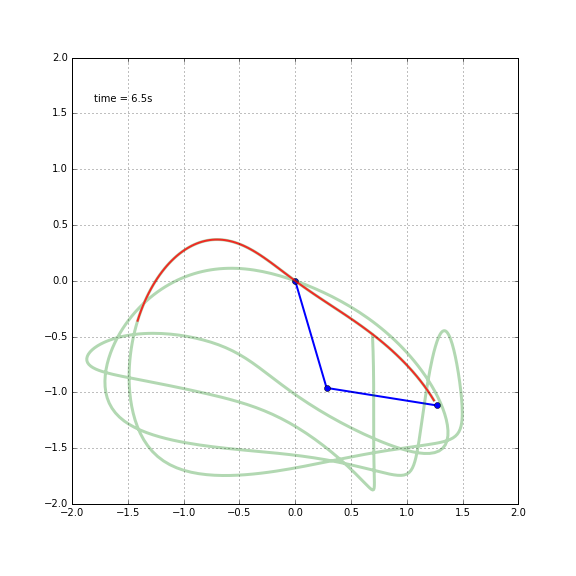
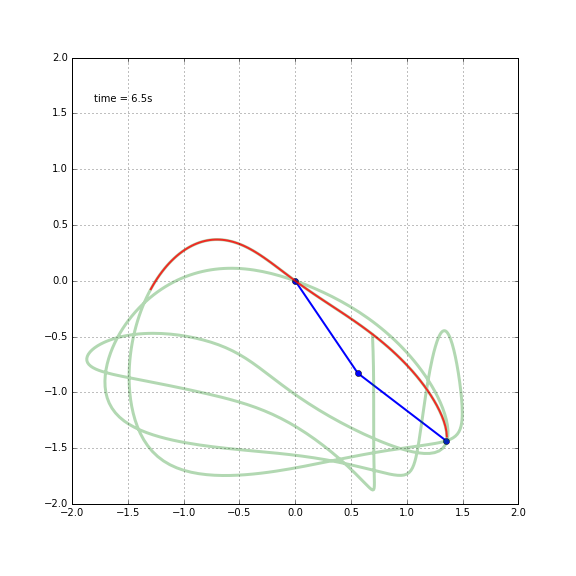
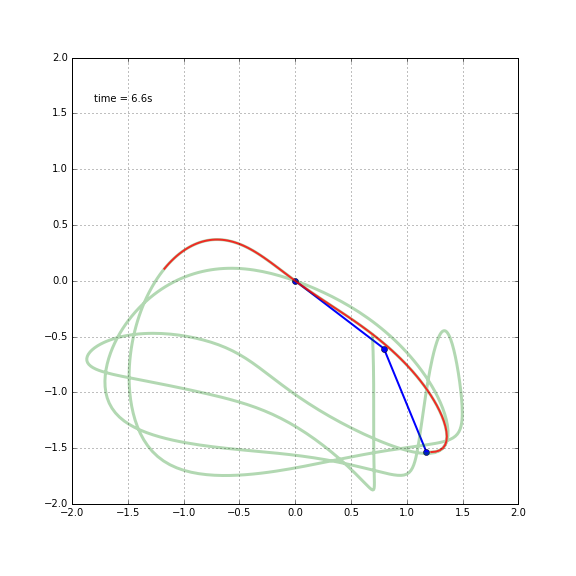
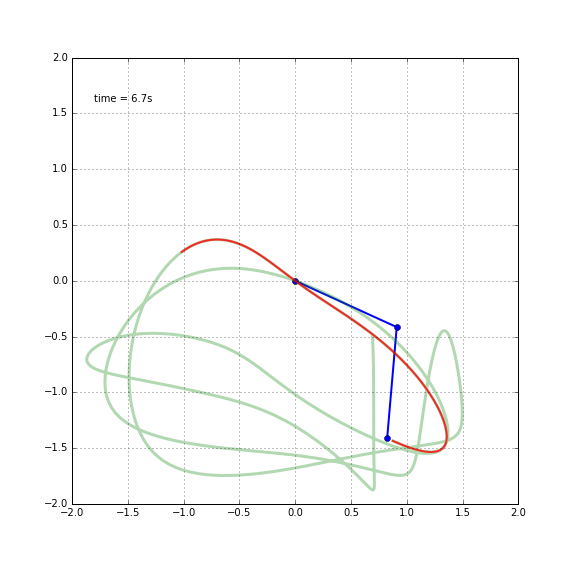
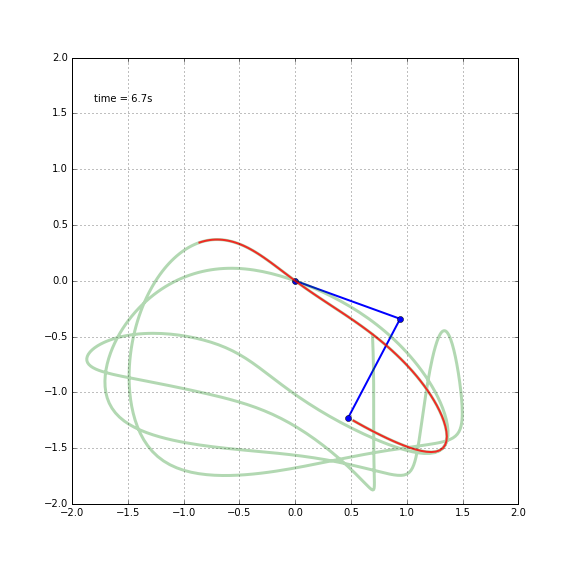
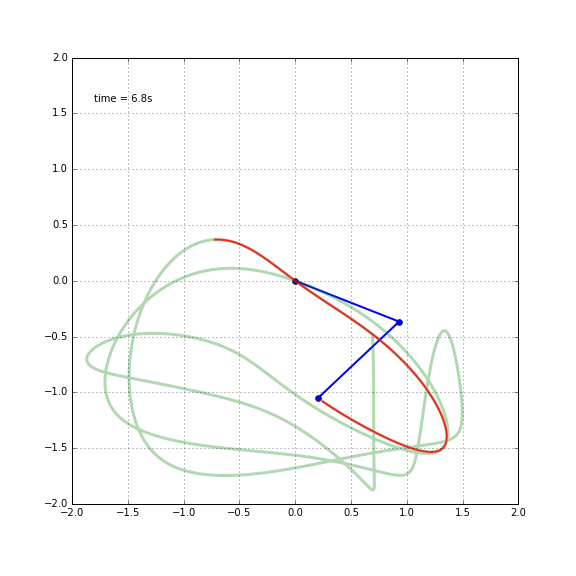
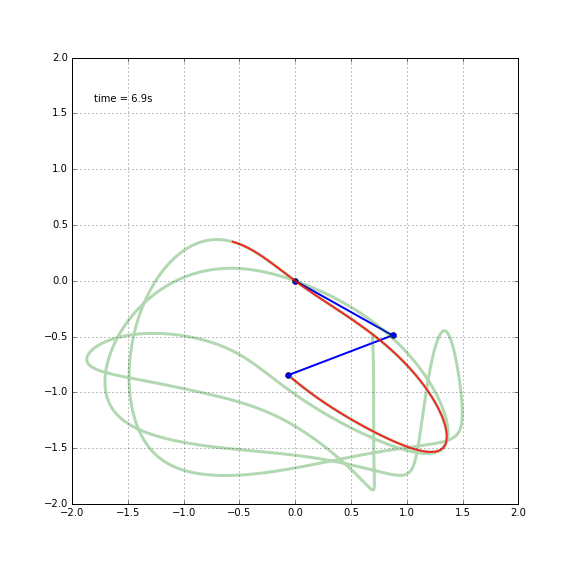
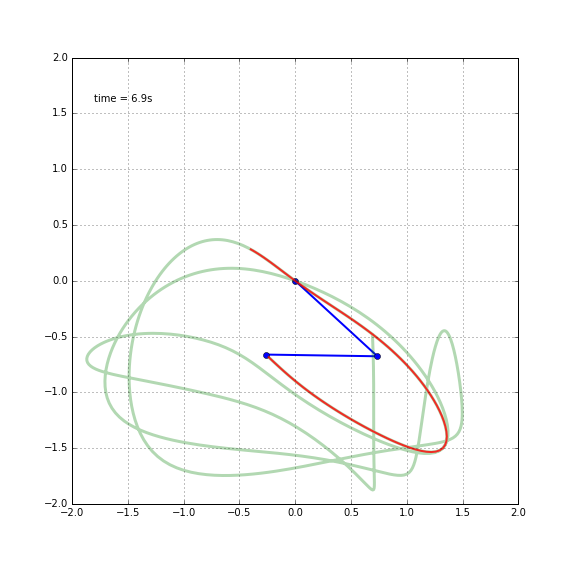
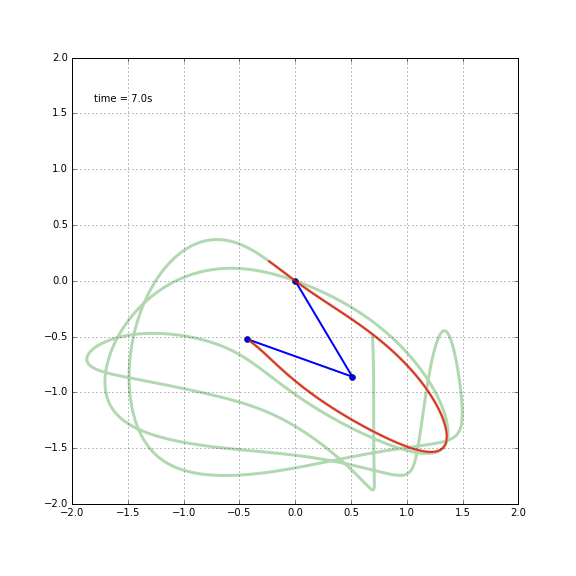
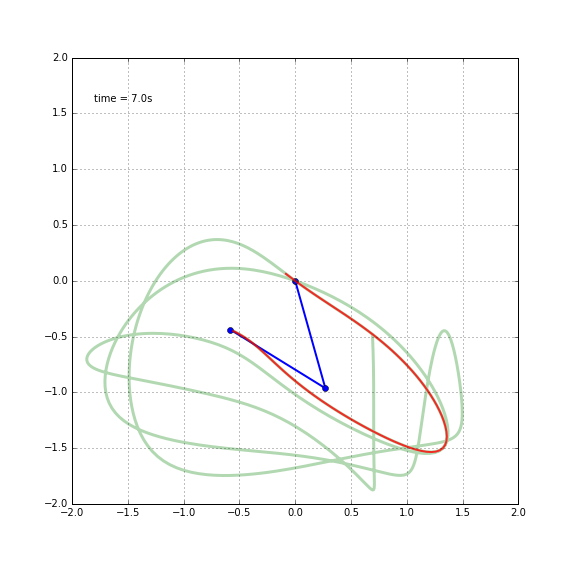
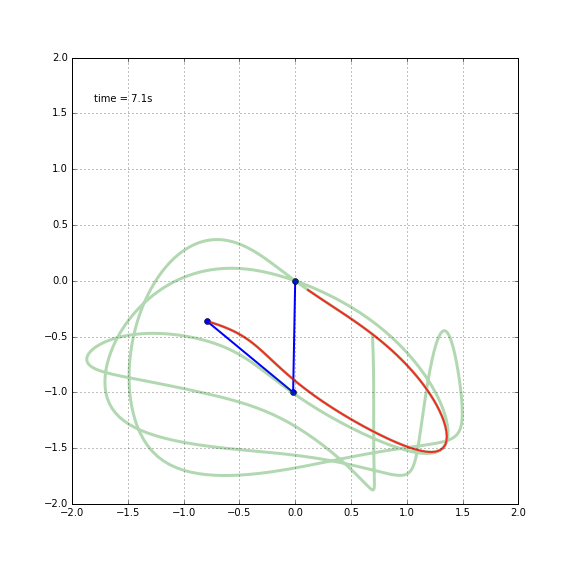
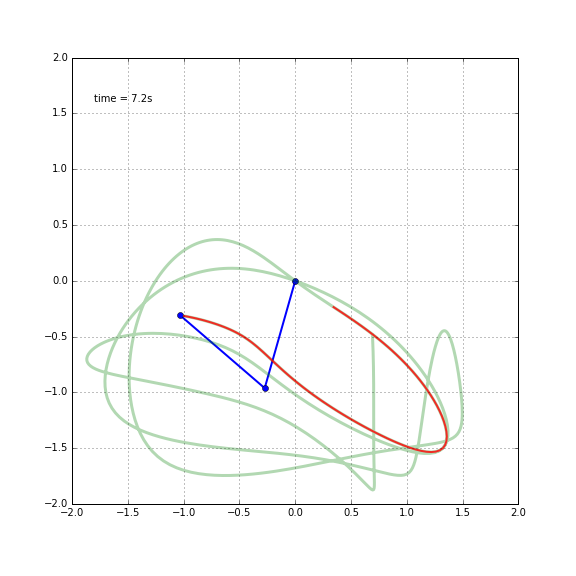
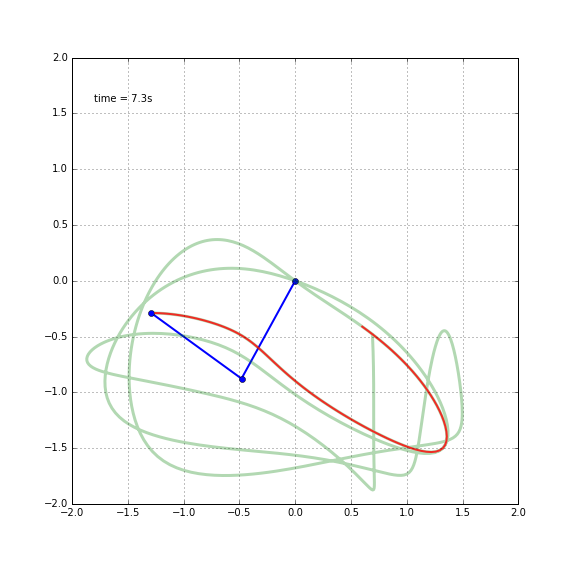
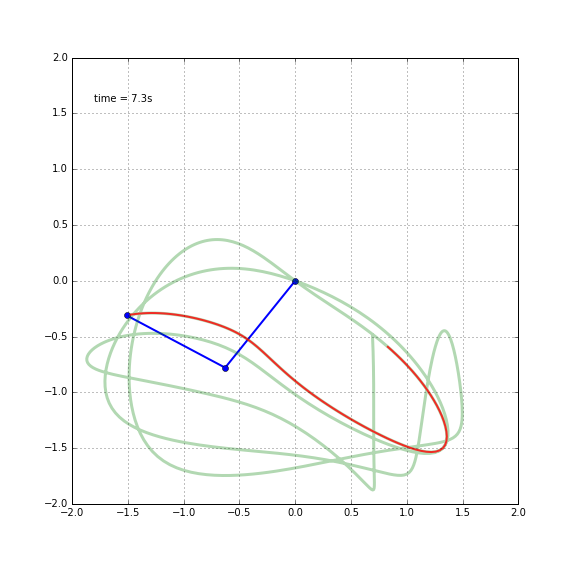
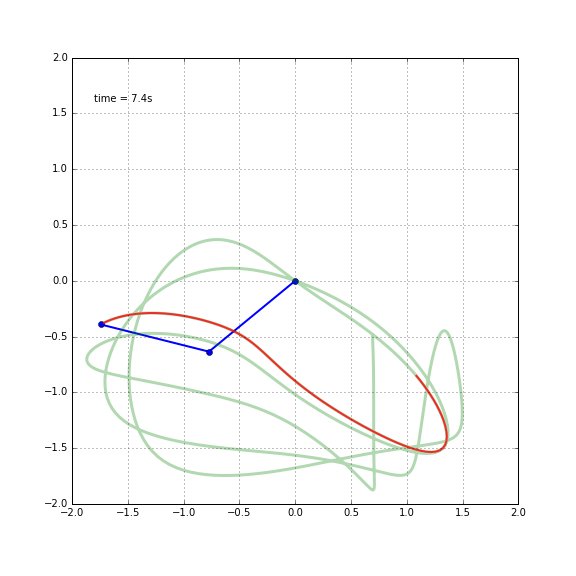
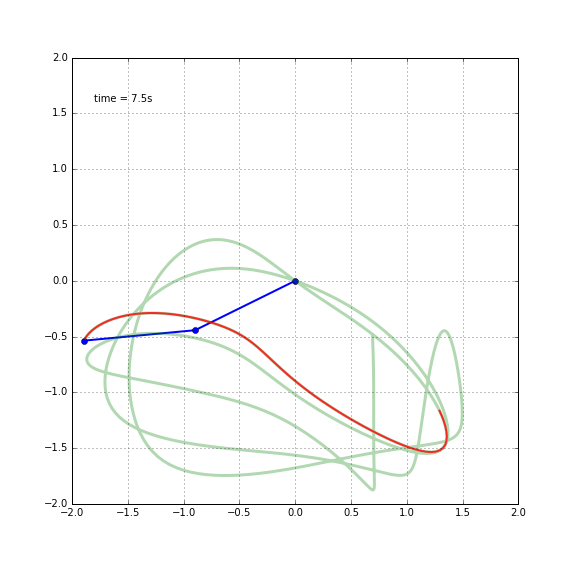
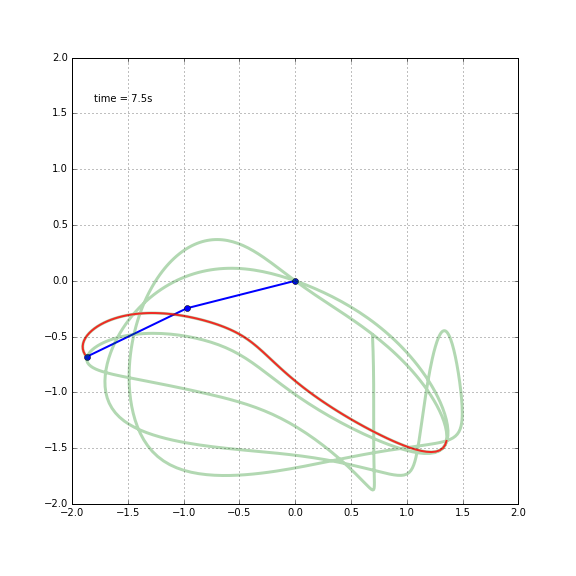
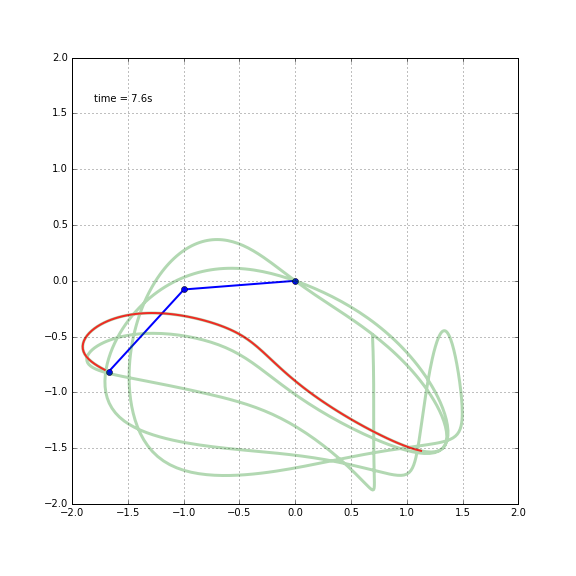
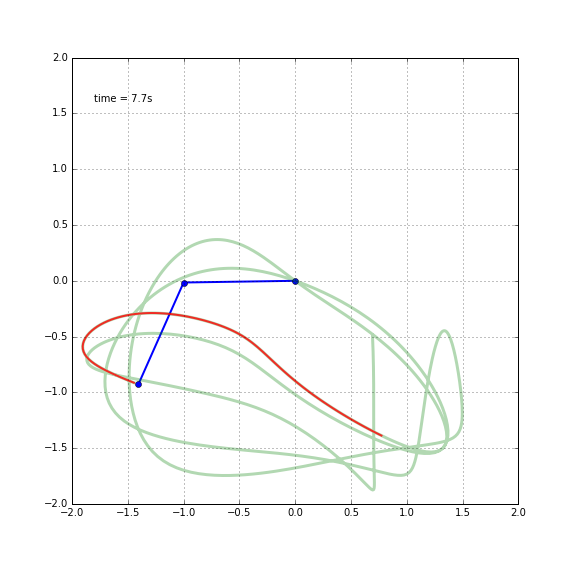
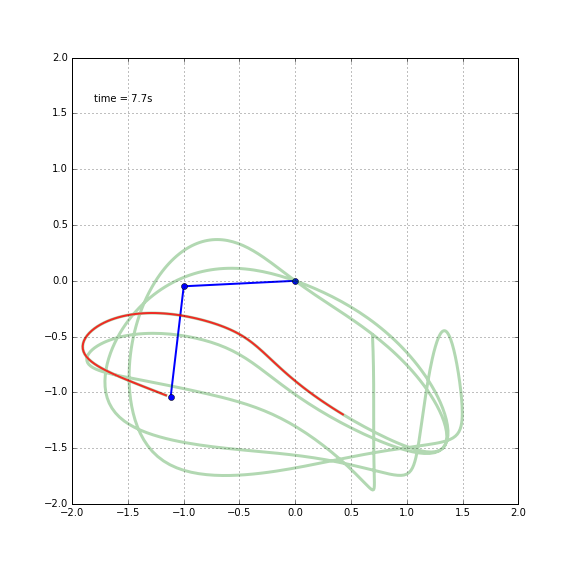
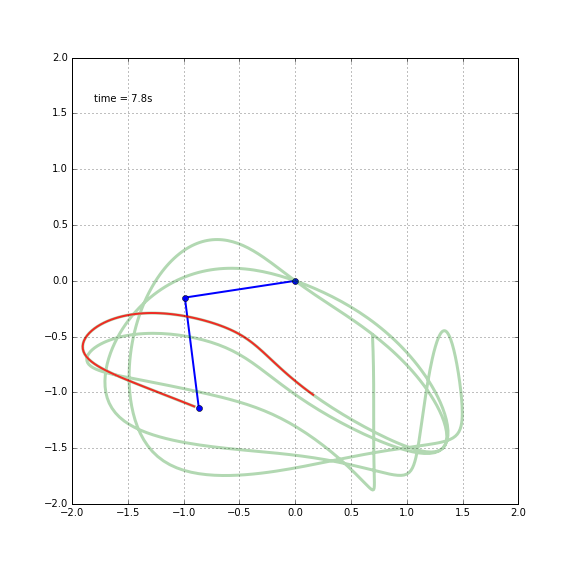
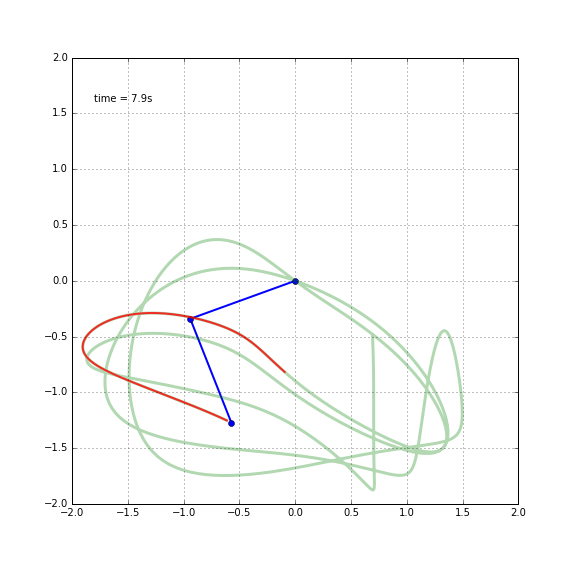
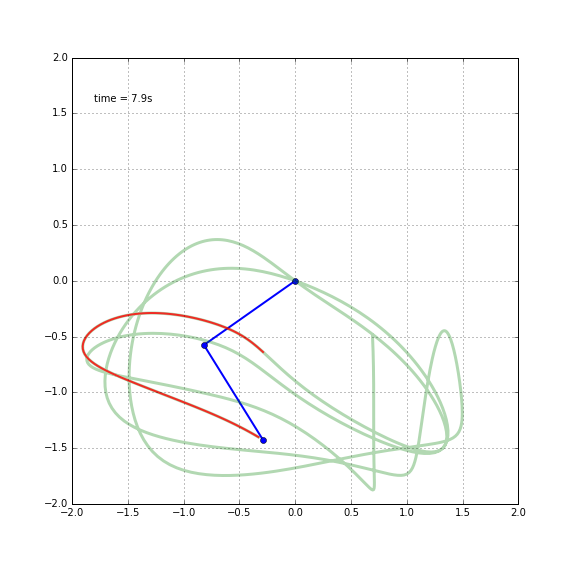
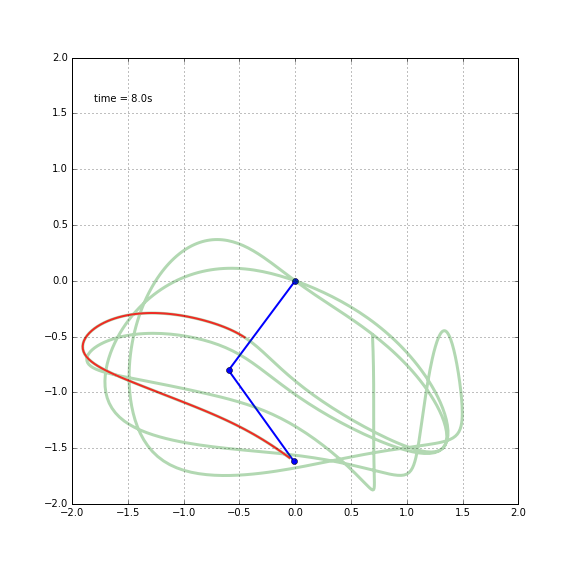

In [9]:
# integrate your ODE using scipy.integrate.
y = integrate.odeint(derivs, state, t)

x1 = L1*sin(y[:, 0])
y1 = -L1*cos(y[:, 0])

x2 = L2*sin(y[:, 2]) + x1
y2 = -L2*cos(y[:, 2]) + y1

fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

trace1, = ax.plot([], [], '-', lw=3, alpha=0.3)
trace2, = ax.plot([], [], '-', lw=2, alpha=0.8)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    i = int(i)
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    trace1.set_data(x2[0:i],y2[0:i])
    trace2.set_data(x2[max(0,i-100):i],y2[max(0,i-100):i])
    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, trace1, trace2, time_text

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=linspace(0,800,120),interval=100, blit=True)
